# <center><span style="color:DarkBlue">타이타닉 생존 예측 (1): EDA 및 1차 전처리</span></center> <a class="tocSkip">
- 수많은 유명인사와 부호들의 죽음으로 사람들에게 각인되었던 타이타닉호 침몰 사건.
- 타이타닉 승객들에 관한 데이터를 토대로 이들의 생존 여부를 예측해보기.
- 이를 통해, 기초적인 데이터 분석 과정과 Classification(분류) 문제를 경험해볼 수 있음.

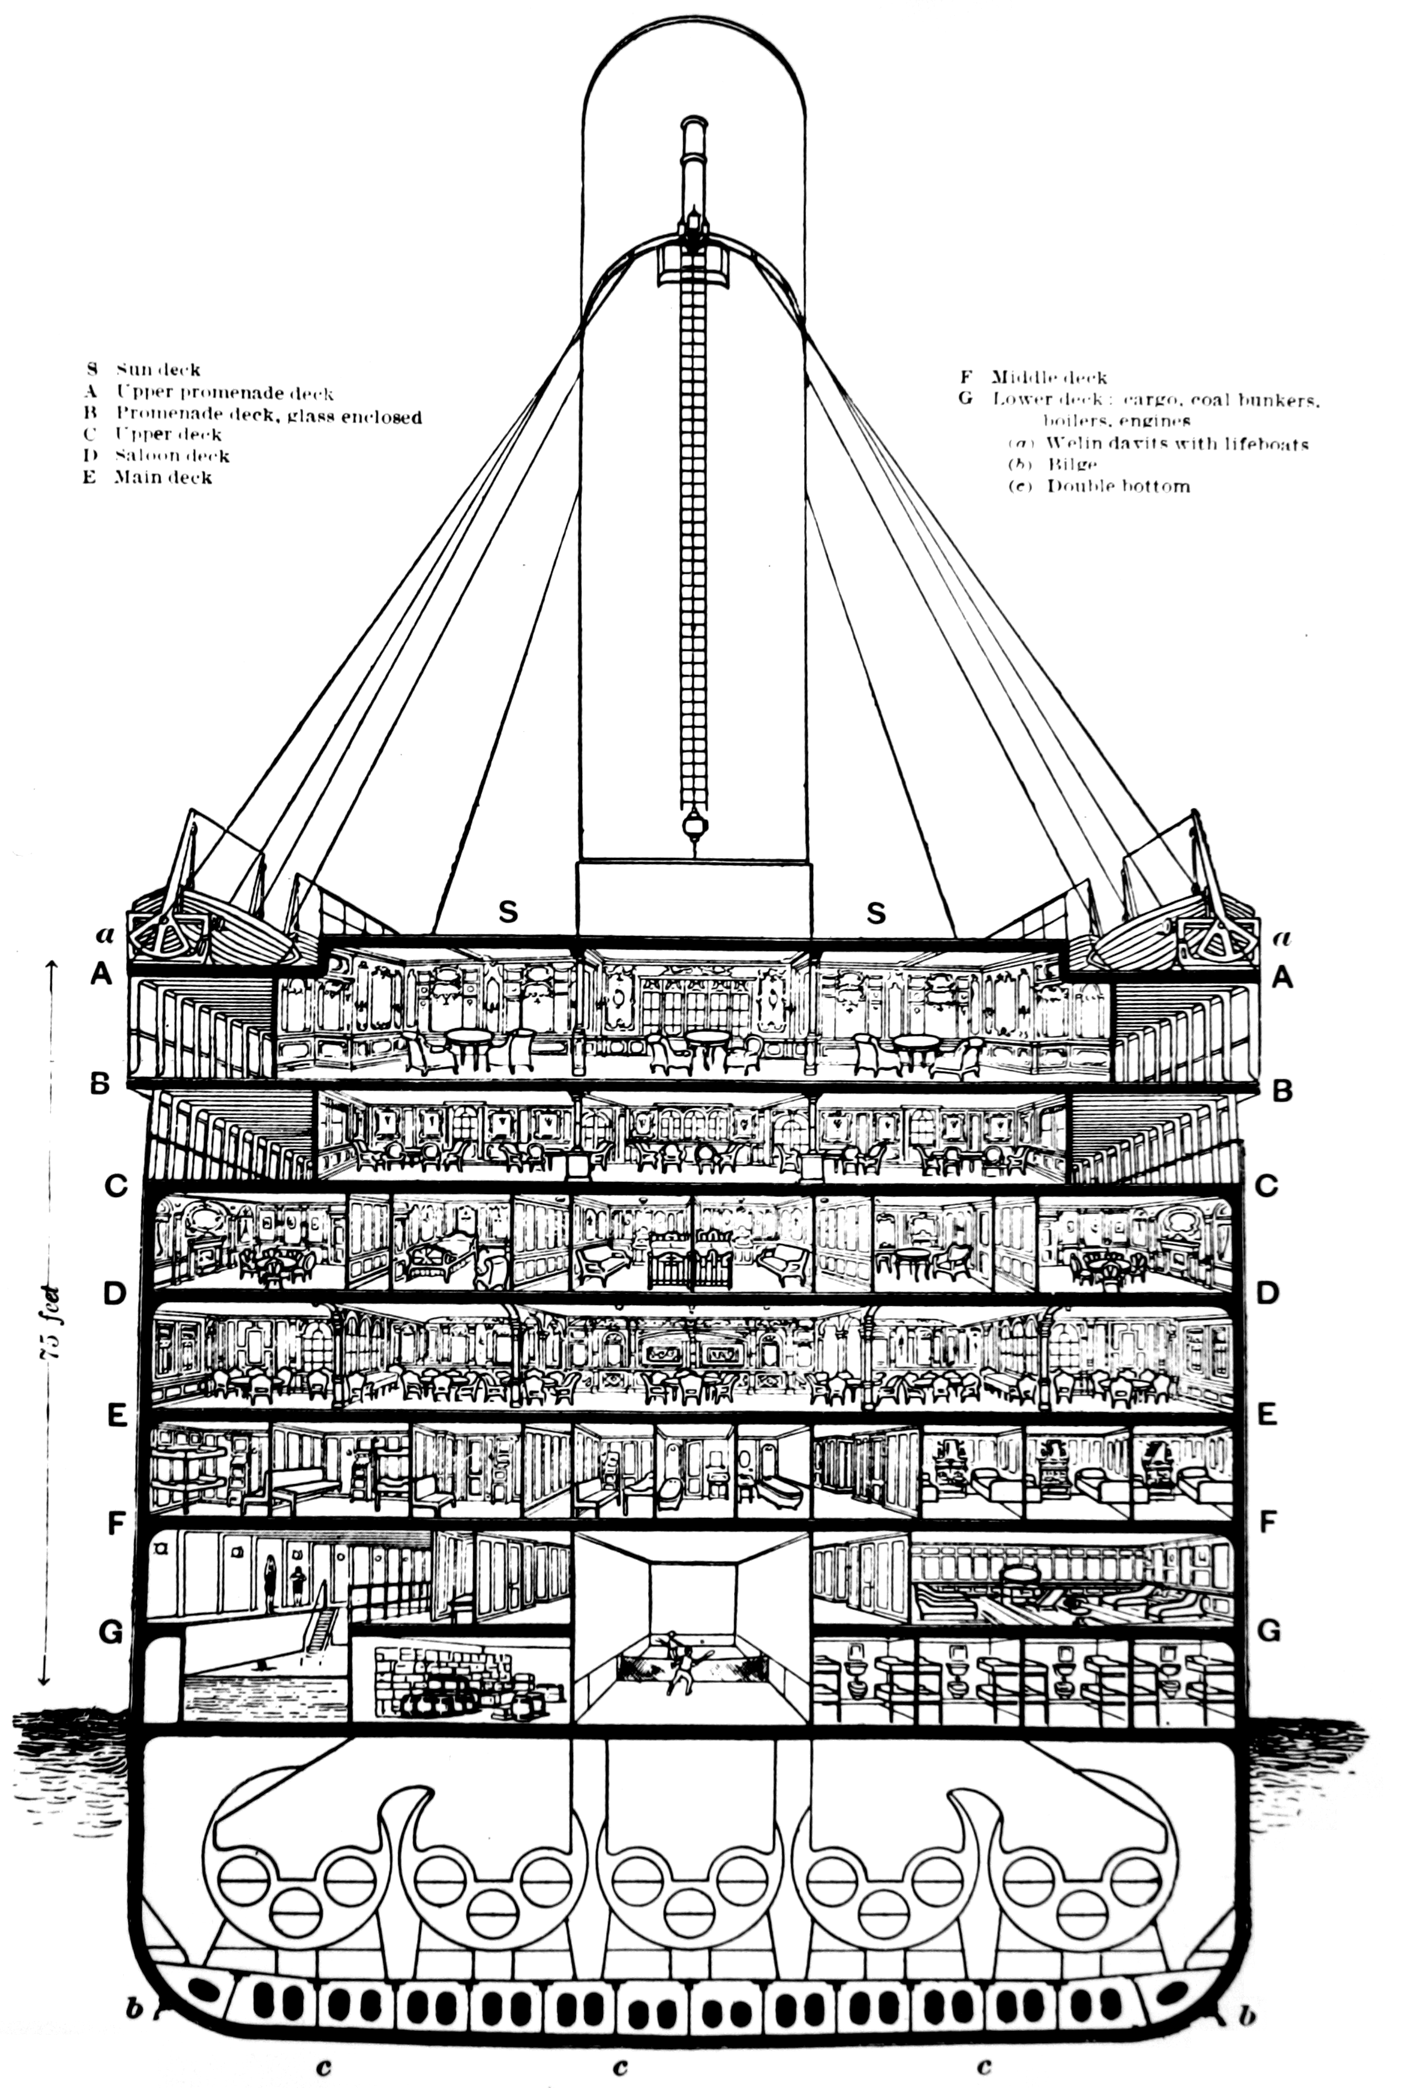

**도메인 지식**
- 1912년 4월 10일, RMS 타이타닉호는 영국의 Southampton에서 출항해서 프랑스의 Cherbourg와 아일랜드의 Queenstown에 기항함.
- 1900년대 시대적 배경에는 'Lady First'라는 개념이 존재해서 여성과 어린이를 우선적으로 구조했을 가능성이 큼.
- 타이타닉호에는 여러 사회 계층들이 있었음. (사회적 위치가 높은 사람, 부자, 일반인, 가난한 이민자 등)
- 3등석은 여러 구역이 철창으로 막혀 제한되어 있었고, 배가 미로처럼 복잡했음. 그리고 3등석 승객들 중에는 영어를 잘 하지 못하는 사람들도 많았음.

**변수 설명**
- (1) PassengerId: 승객의 고유 식별자 (데이터셋 내에서 각 승객마다 고유한 ID가 부여됨.)
- (2) Survived: 생존 여부 (0은 사망, 1은 생존을 의미)
- (3) Pclass: 승객의 객실 등급 (1은 일등석, 2는 이등석, 3은 삼등석을 나타냄.)
- (4) Name: 승객의 이름 (형식: 성, 호칭. 이름)
- (5) Sex: 승객의 성별 ("male"은 남성, "female"은 여성을 의미함.)
- (6) Age: 승객의 나이
- (7) SibSp: 함께 탑승한 형제자매 또는 배우자의 수
- (8) Parch: 함께 탑승한 부모 또는 자녀의 수
- (9) Ticket: 티켓 번호
- (10) Fare: 지불한 운임 요금
- (11) Cabin: 객실 번호
- (12) Embarked: 탑승한 항구 ("C"는 Cherbourg, "Q"는 Queenstown, "S"는 Southampton을 의미함.)

## 라이브러리 설치 및 환경 설정 <a class="tocSkip">

In [1]:
#기본 라이브러리 설치
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션

#!pip install missingno
import missingno as msno #결측치 유무 확인 라이브러리

In [2]:
#working directory 확인
os.getcwd() #현재 작업 위치 출력

'C:\\Users\\lys17\\Desktop'

# 데이터 불러오기
Titanic-Dataset.csv 파일 불러오기

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# EDA
- 변수 구조 확인
- 중복값 여부 확인
- 결측치 여부 확인
- 이상치 여부 확인

- 상관관계 확인
- 범주형 & 수치형 변수 분포 확인
- 변수들간 관계 확인

 ## 변수 구조 확인

In [4]:
#전체적인 데이터 구조 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#데이터 차원 확인
data.shape

(891, 12)

In [6]:
#수치형 변수들의 기술통계량 확인
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## 중복값 여부 확인

In [7]:
#중복된 값을 가진 행 출력
data[data.duplicated(keep=False)] #keep=False: 모든 중복행을 표시

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

=> 중복값 없음!

## 결측치 여부 확인

In [8]:
#변수별 결측치 갯수 확인
data.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

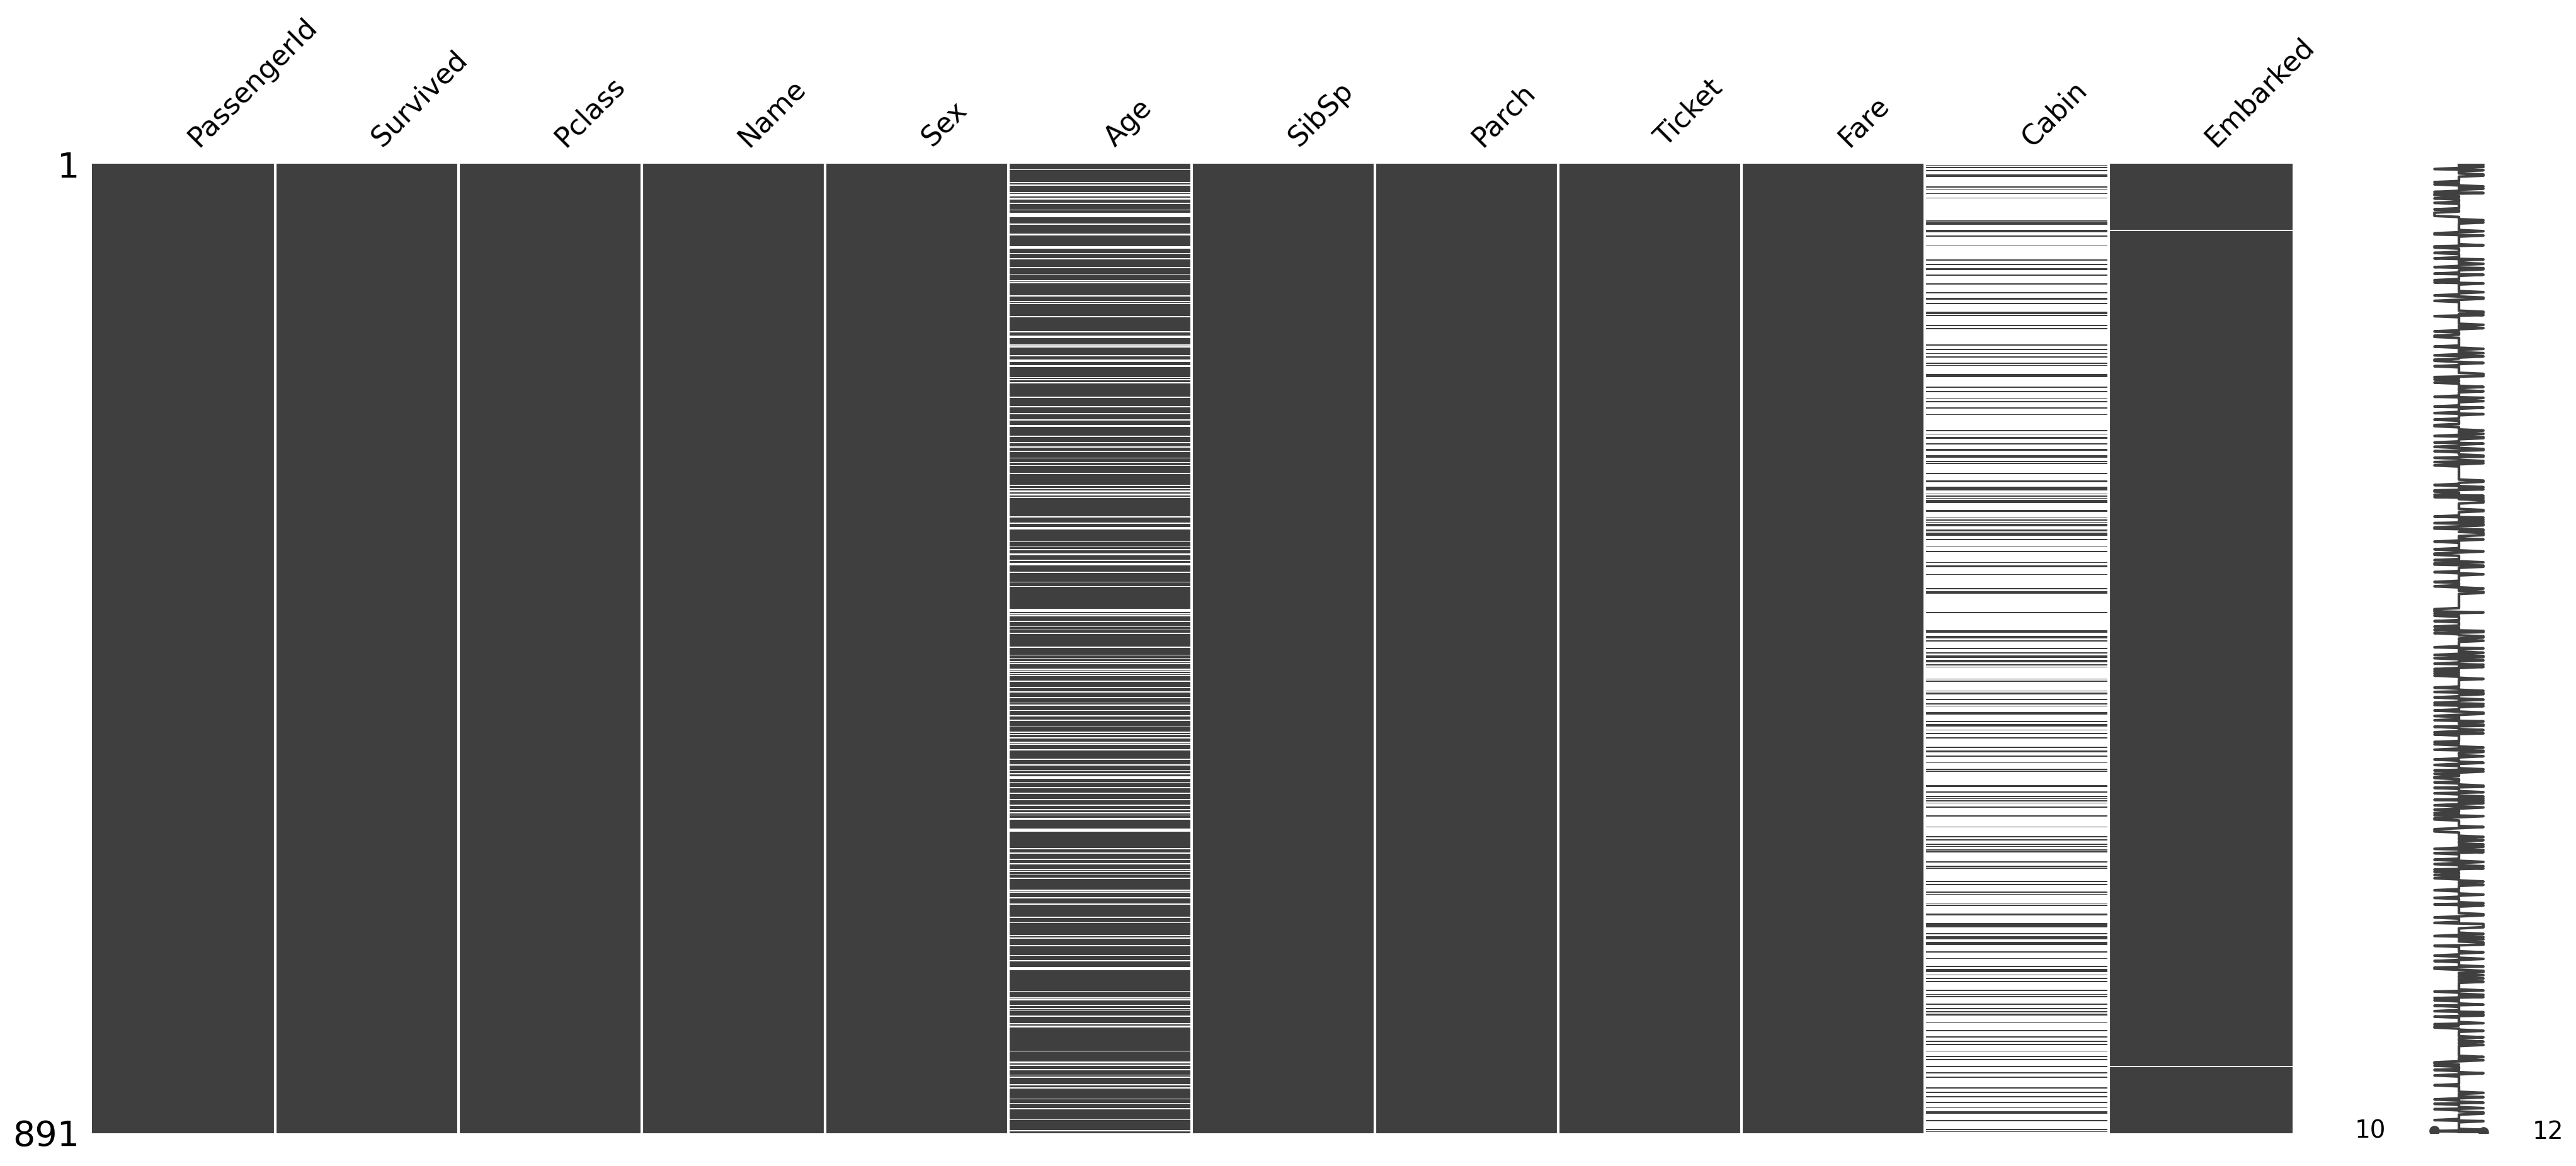

In [9]:
msno.matrix(data)

=> Embarked, Age, Cabin 총 3개의 변수에서 결측치 발생함.
<br>**전처리 단계에서 결측치 처리 필요해보임.**

## 이상치 여부 확인
수치형 변수들에 한해서 이상치를 파악
<br>*수치형 변수들 중에서 이상치가 나올 수 없는 경우인 PassengerId, Survived, Pclass는 제외함*

Text(0.5, 1.0, 'Box Plot')

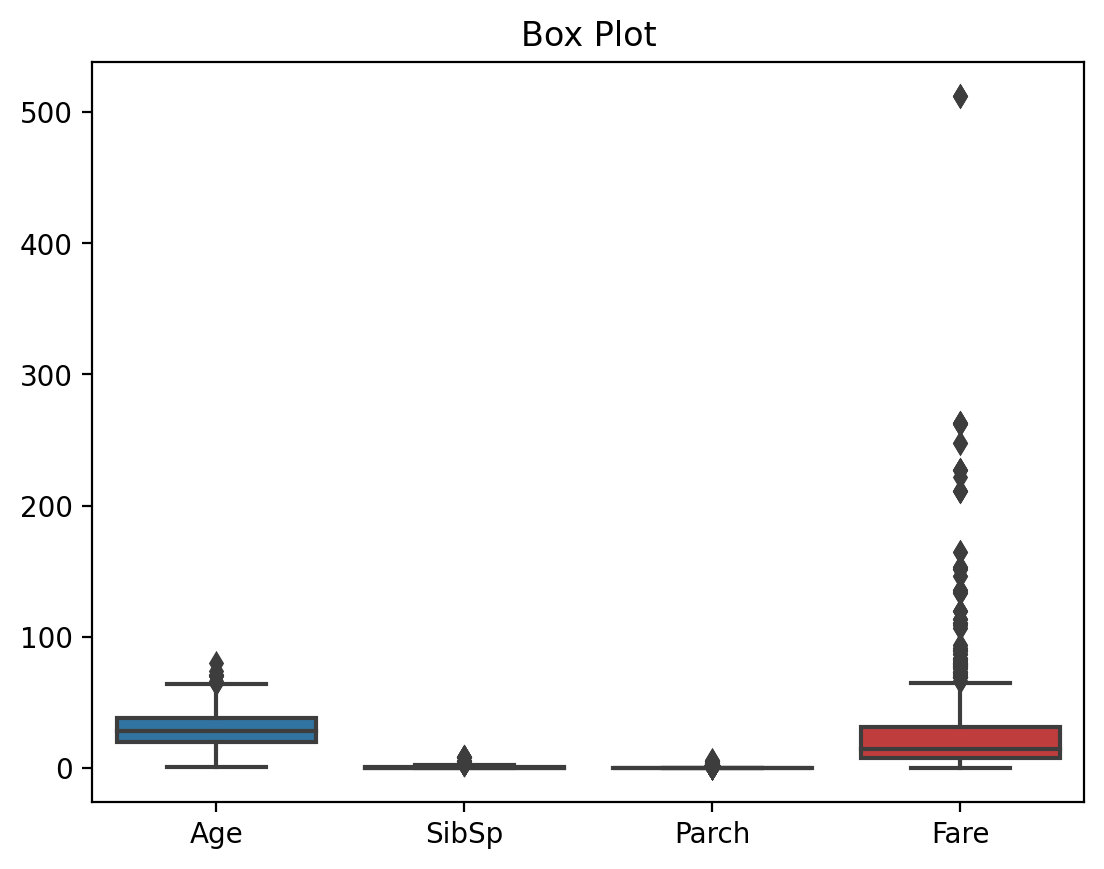

In [10]:
#seaborn을 이용한 BoxPlot
sns.boxplot(data[["Age", "SibSp", "Parch", "Fare"]])
plt.title("Box Plot")

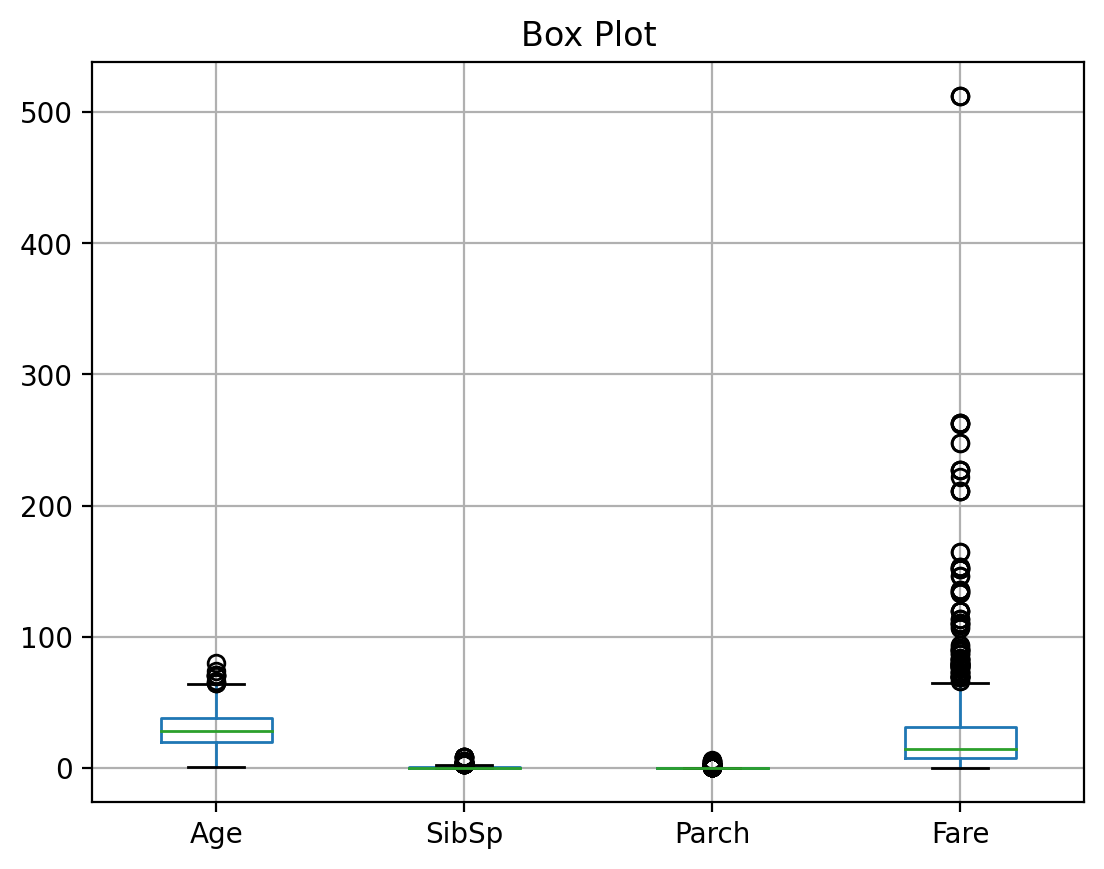

In [11]:
#matplotlib을 이용한 BoxPlot
data.boxplot(column=["Age", "SibSp", "Parch", "Fare"])
plt.title("Box Plot")
plt.show()

=> Box Plot에 의하면 이상치는 존재하는 듯 보임. (추후 확인 필요)

## 상관관계 확인
수치형 변수들에 한해서 상관관계 확인
<br>*수치형 변수들 중에서 형태는 수치형이지만 사실상 범주형에 가까운 PassengerId, Pclass는 제외함*

In [12]:
#변수간 상관계수 계산
cor = data[["Survived", "Age", "SibSp", "Parch", "Fare"]].corr()
cor

Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.077221 -0.035322  0.081629  0.257307
Age      -0.077221  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307  0.096067  0.159651  0.216225  1.000000

<Axes: >

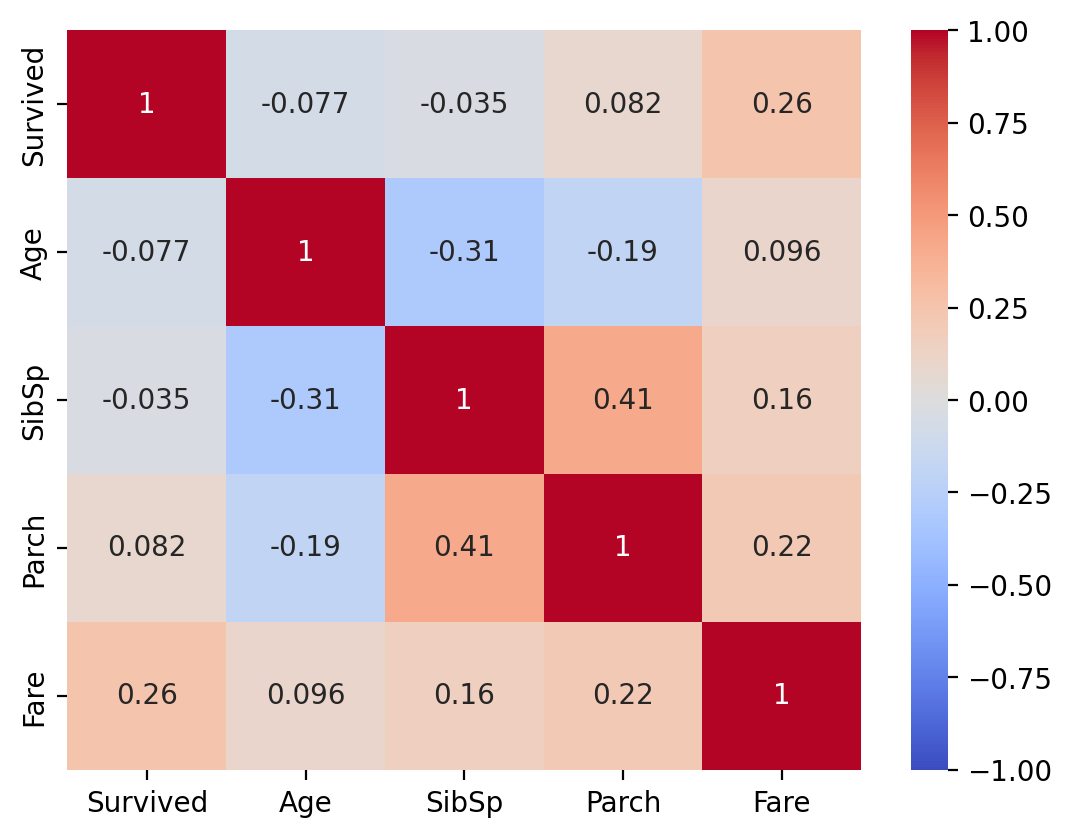

In [13]:
#HeatMap 생성
sns.heatmap(cor, cmap="coolwarm", annot=True, vmin=-1,vmax=1)

#cmap: 컬러맵 설정
#annot=True: 상관계수 표시 여부
#vmin, vmax: 최대, 최소 값 설정

=> 전체적으로 변수들 사이에 상관관계가 크지 않음.
<br> 제일 상관계수가 큰 변수쌍은 (SibSp, Parch)

<Axes: >

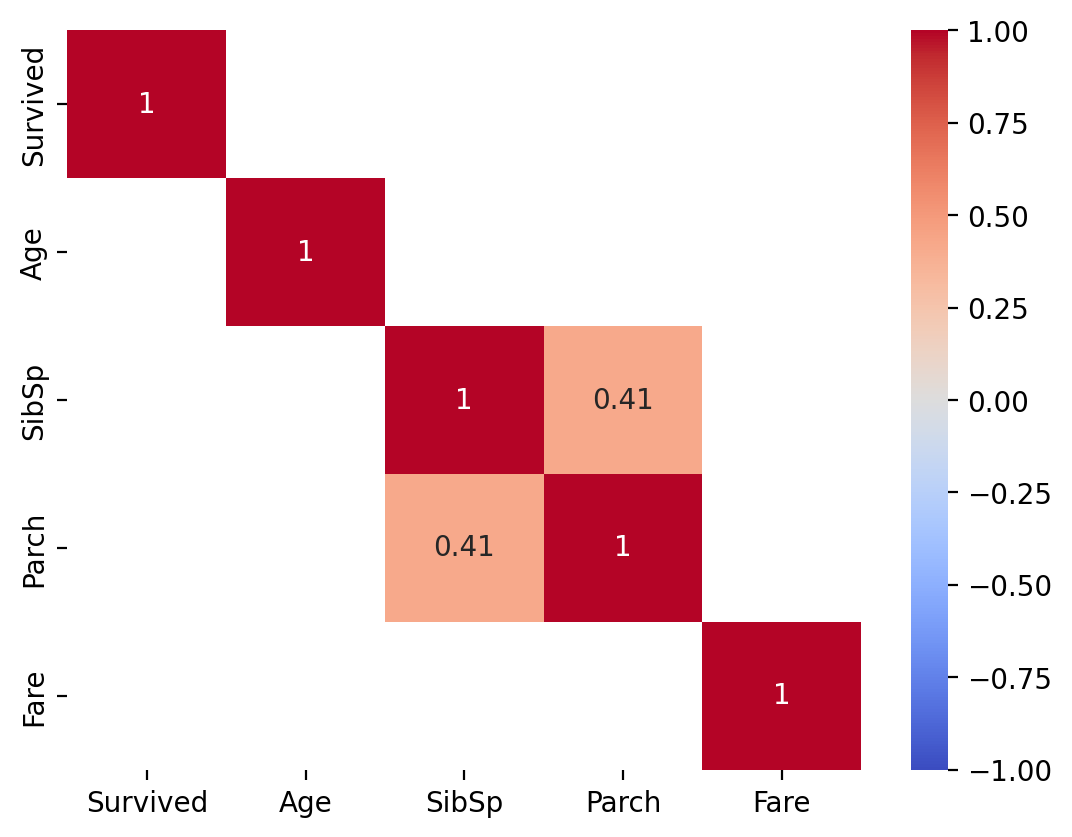

In [14]:
#HeatMap에서 상관계수의 절댓값이 0.4이상인 것만 표시
sns.heatmap(cor[abs(cor) >= 0.4], cmap="coolwarm", annot=True, vmin=-1,vmax=1)

## 범주형 변수
범주형 변수로는 PassengerId, Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked가 있음. (의미상 범주형 변수도 포함)

### ~PassengerId~
탑승객 고유 아이디

In [15]:
#해당 변수의 고윳값을 통해 PassengerId의 값이 정상적인지 확인
len(data["PassengerId"].unique())

891

=> 고윳값의 개수와 전체 데이터 개수가 동일하므로 정상!

**사실상 PassengerId는 승객 고유의 아이디로 index와 다를바 없음. 그래서 사용하지 않을 예정.**

### Survived <span style="color:Red">(Target Variable)</span>
생존 유무 (타겟 변수)

In [16]:
#해당 변수의 값별 갯수 확인
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

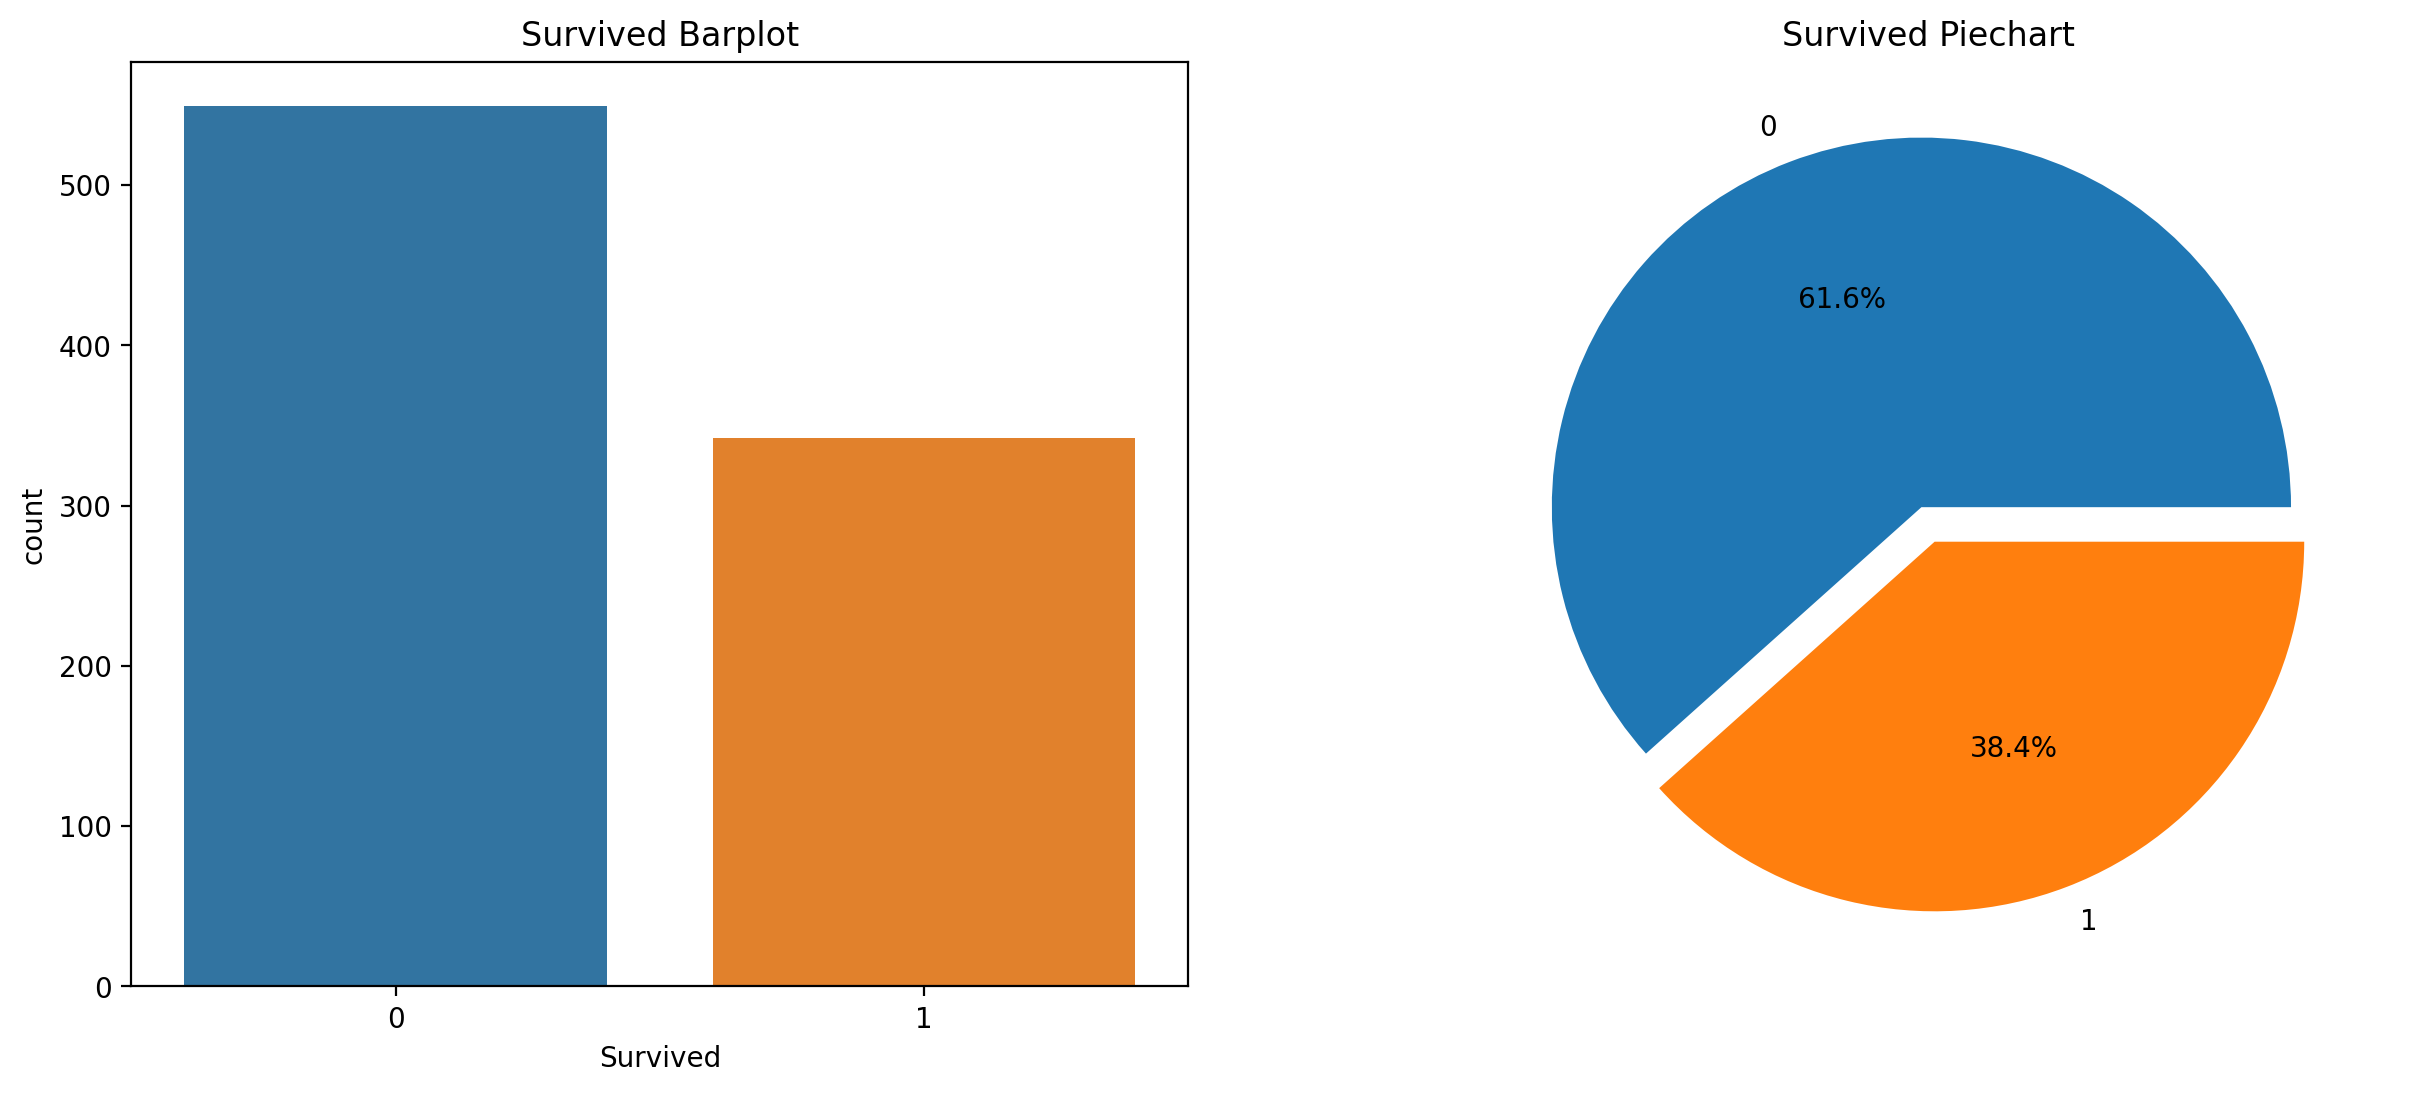

In [17]:
#막대그래프와 파이차트로 사망(0)과 생존(1)의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["Survived"], ax=ax[0])
ax[0].set_title("Survived Barplot")

data["Survived"].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Survived Piechart")
ax[1].set_ylabel("")

plt.show()

=> 사망자 > 생존자이고, 사망(0)과 생존(1)의 비율은 약 6:4임.

### Pclass
객실 등급

In [18]:
#해당 변수의 값별 갯수 확인
data["Pclass"].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

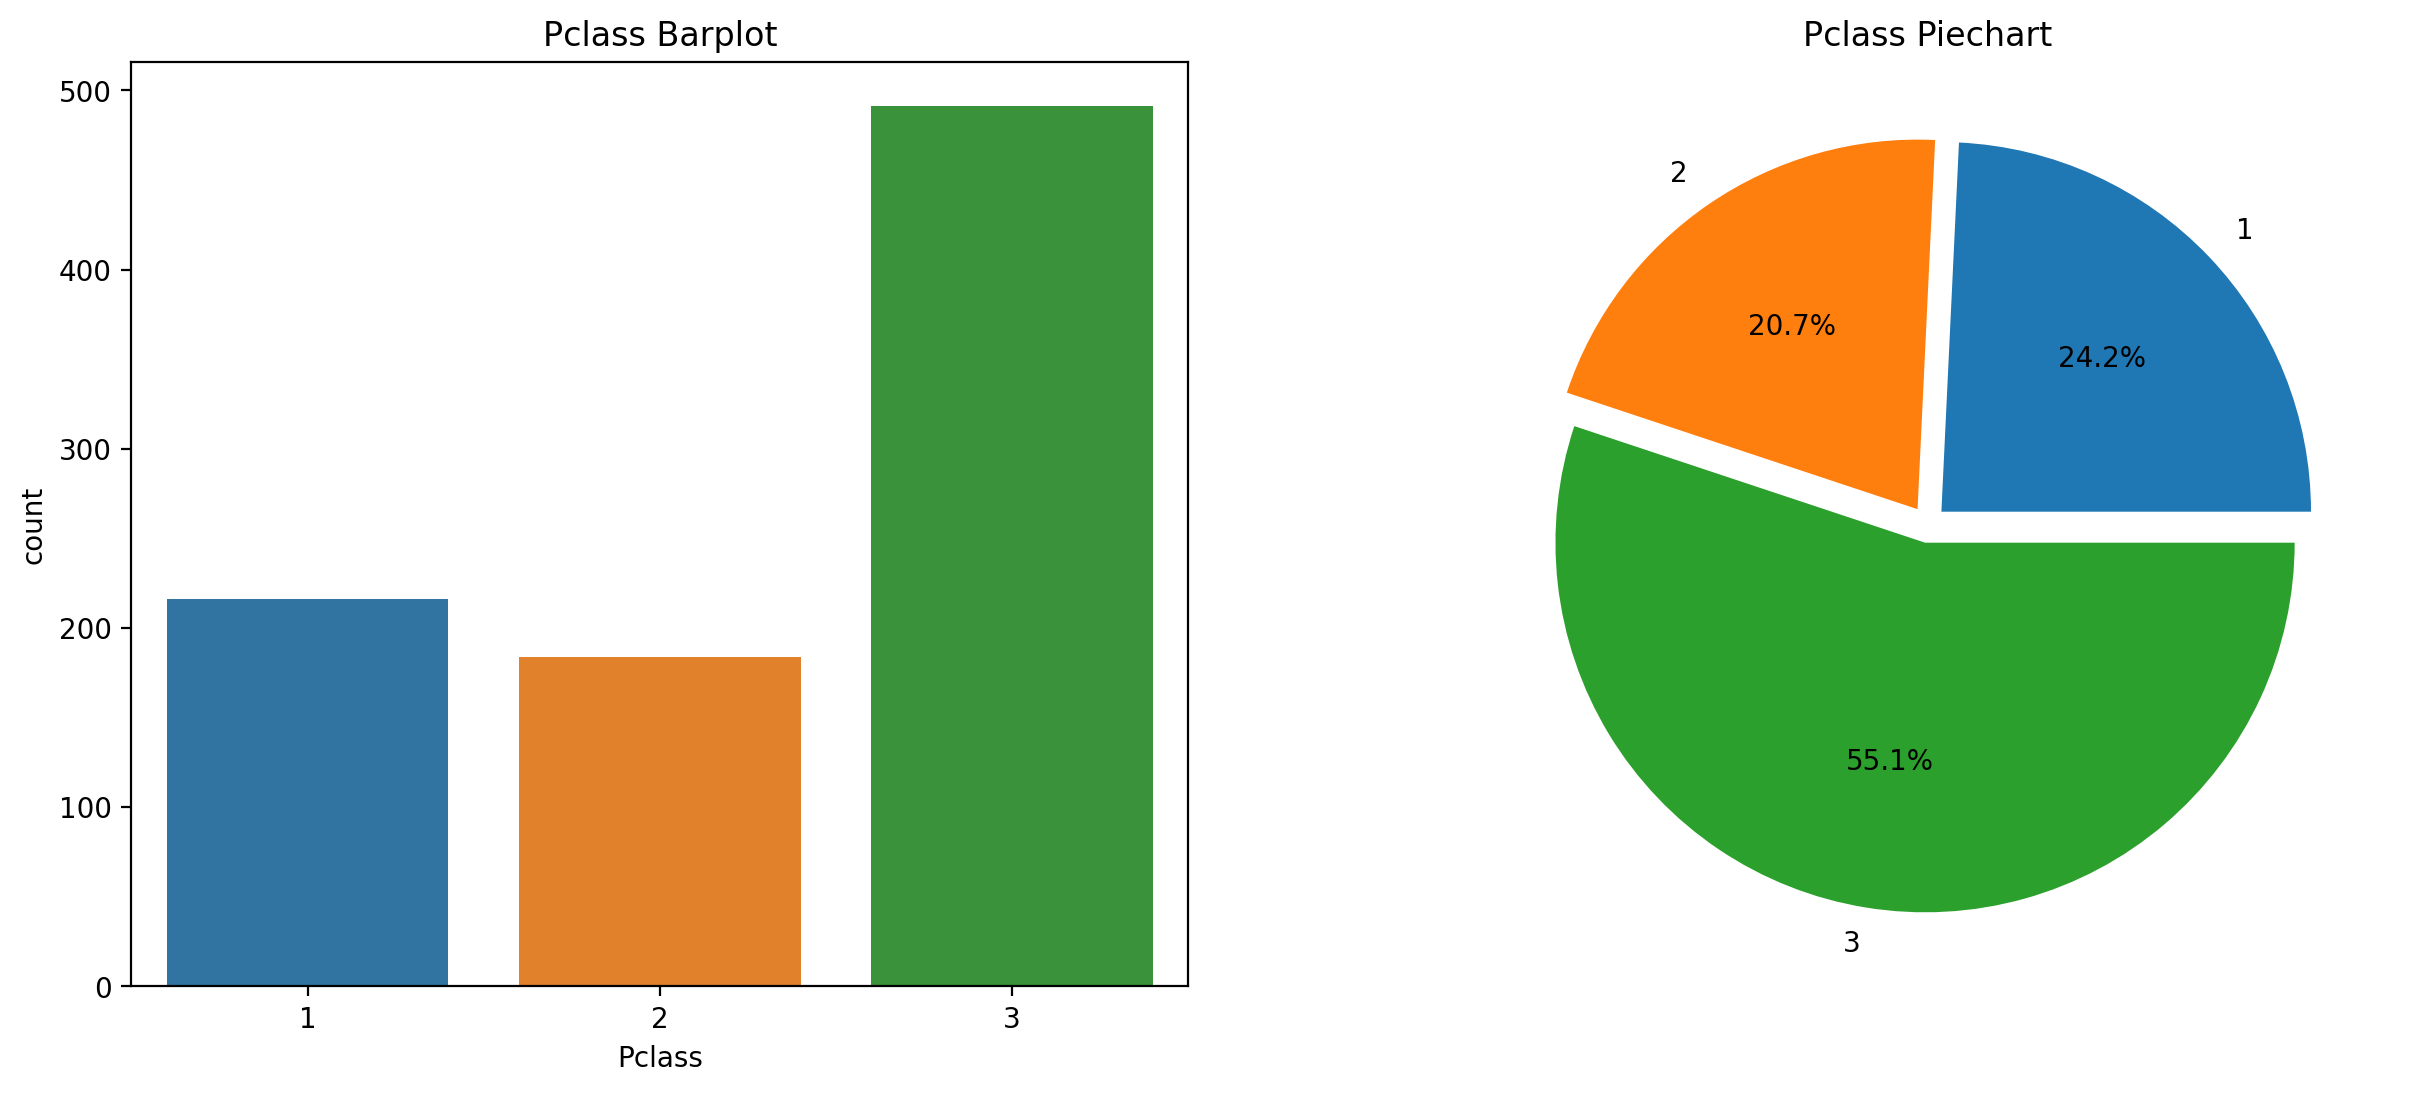

In [19]:
#막대그래프와 파이차트로 1등석, 2등석, 3등석의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["Pclass"], ax=ax[0])
ax[0].set_title("Pclass Barplot")

data["Pclass"].value_counts().sort_index().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Pclass Piechart")
ax[1].set_ylabel("")

plt.show()

=> 3등석 > 1등석 > 2등석 순으로 많고, 3등석은 절반 이상을 차지함

#### Pclass에 따른 Survived 비율

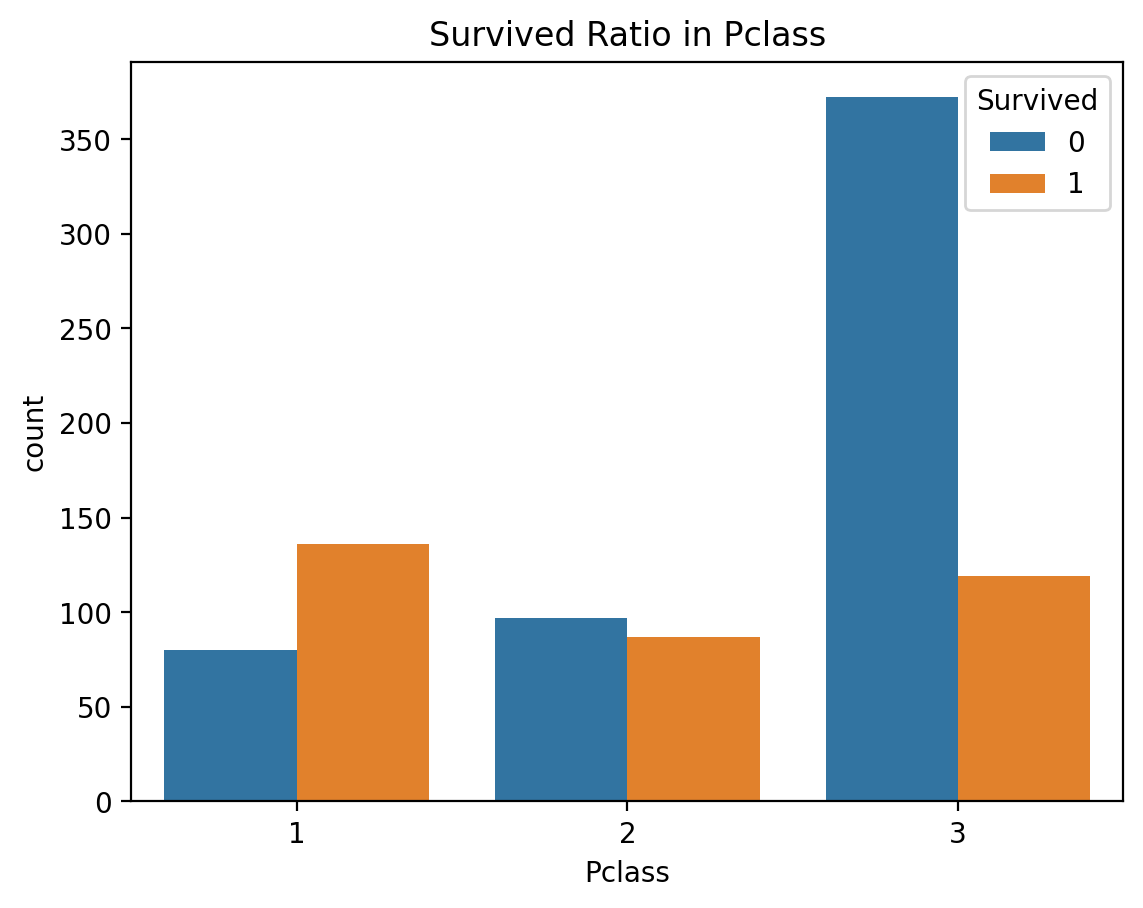

In [20]:
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Survived Ratio in Pclass")
plt.show()

=> 유일하게 1등석에서 사망자 < 생존자이고, 3등석에서 제일 많은 사망자가 나옴.
<br>직관적으로 알 수 있듯이, 1등석은 생존하기에 유리한 환경이었고 3등석은 반대의 상황이었음을 알 수 있음.

**Pclass에 따른 사망과 생존의 비율이 달라지는 것을 보아, 모델링에 사용할 예정임.**

### Name
승객의 이름

In [21]:
#해당 변수의 고윳값으로 중복값 있는지 확인
len(data["Name"].unique())

891

In [22]:
#이름의 형식(규칙)을 확인
data["Name"].head(40)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

=> 성(Surname), 호칭(Title). 이름(Firstname) 형식임.
<br>**전처리 단계에서 성, 호칭, 이름으로 분리하고 인사이트 찾아보기.**

### Sex
승객의 성별

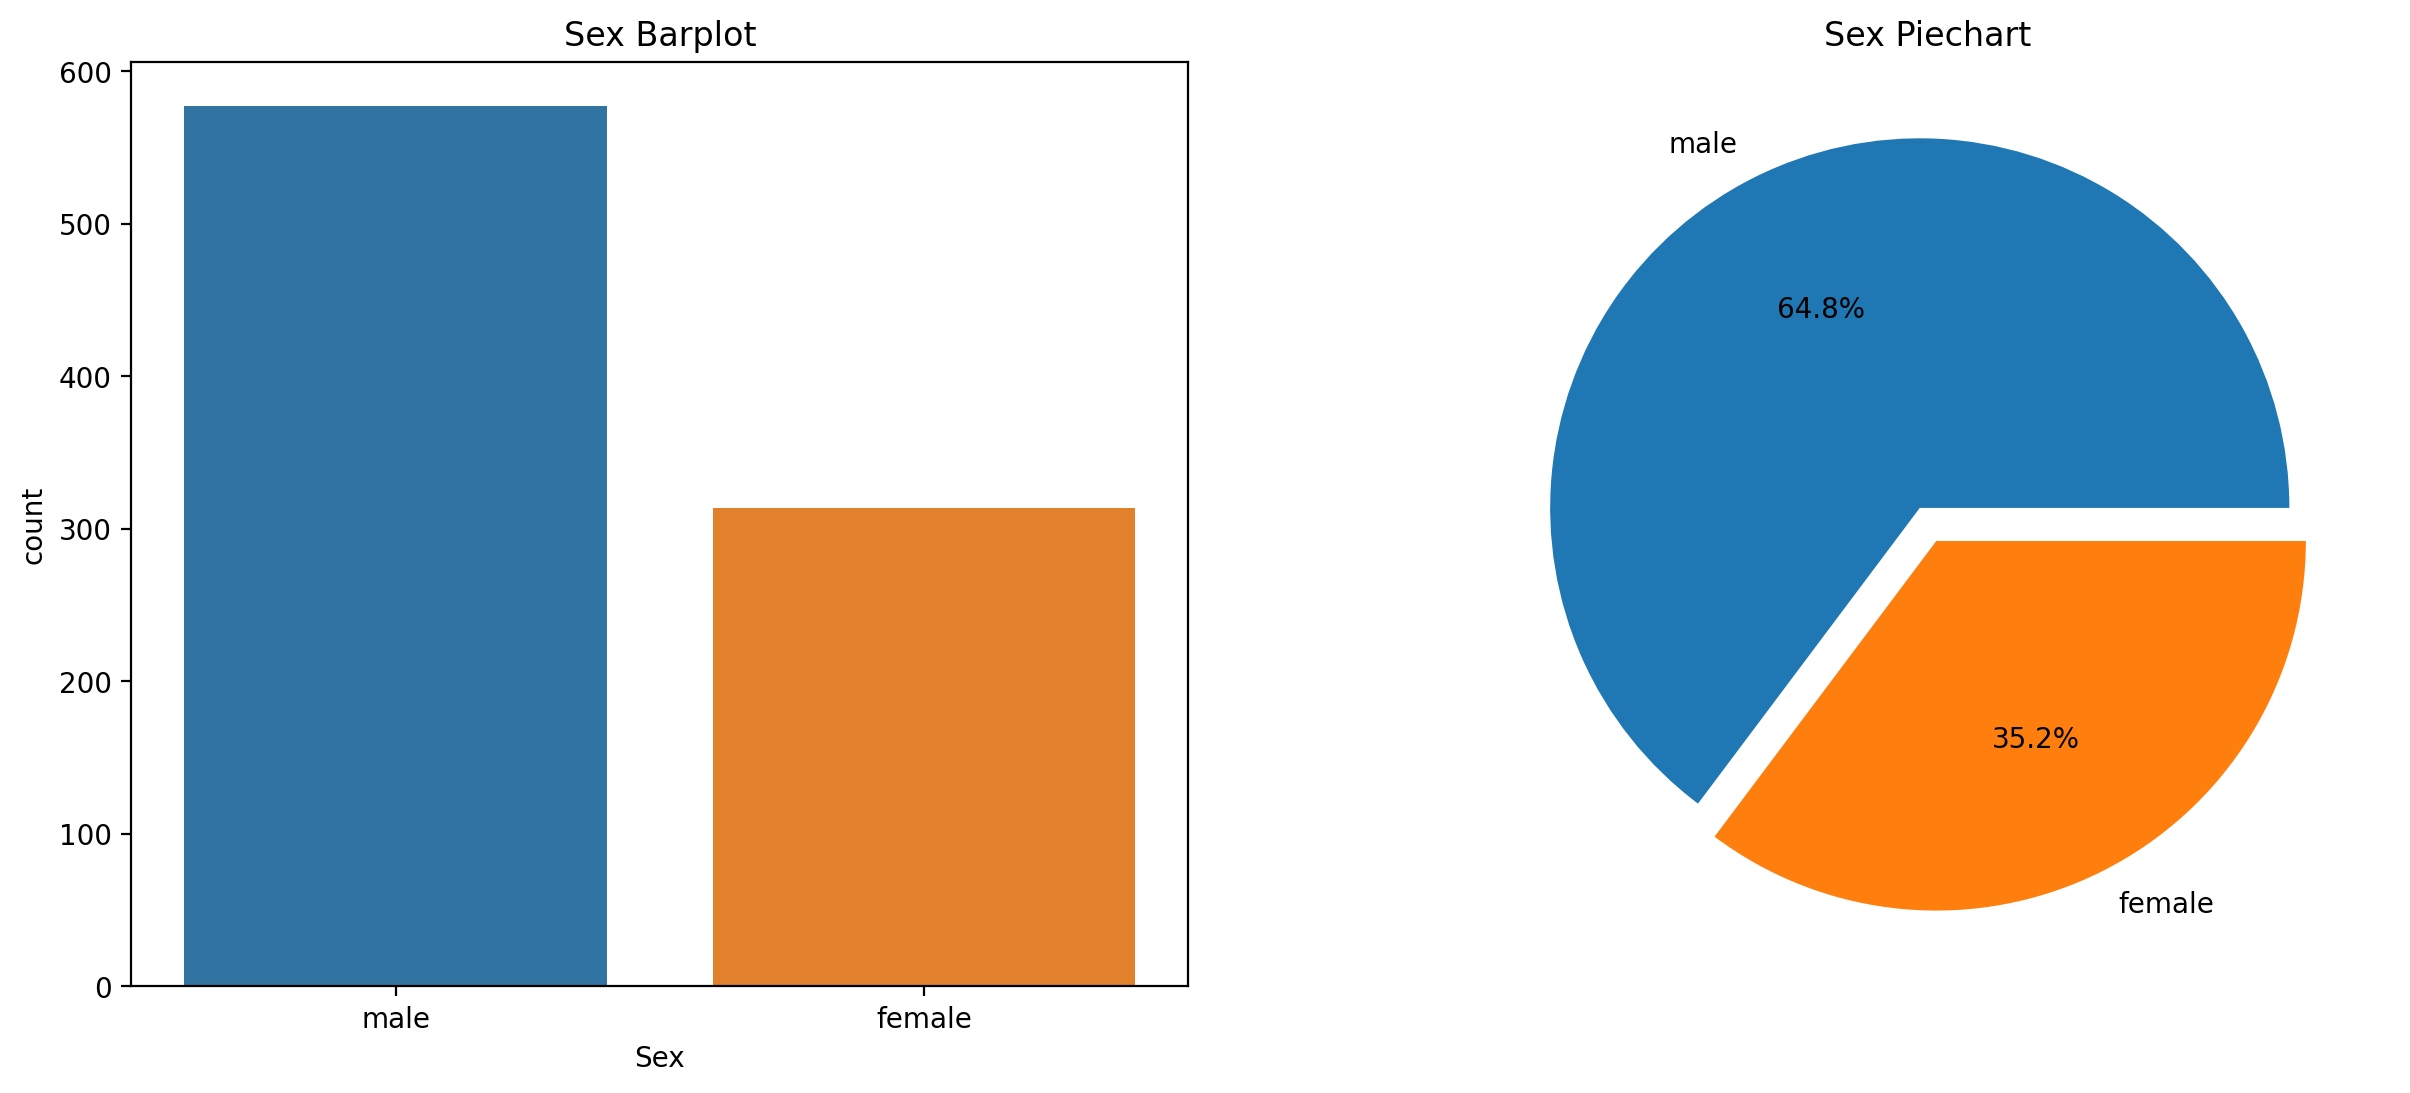

In [23]:
#막대그래프와 파이차트로 남녀의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["Sex"], ax=ax[0])
ax[0].set_title("Sex Barplot")

data["Sex"].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Sex Piechart")
ax[1].set_ylabel("")

plt.show()

=> 남성 > 여성이고, 남성과 여성의 비율은 약 6.5:3.5임.

#### Sex에 따른 Survived 비율

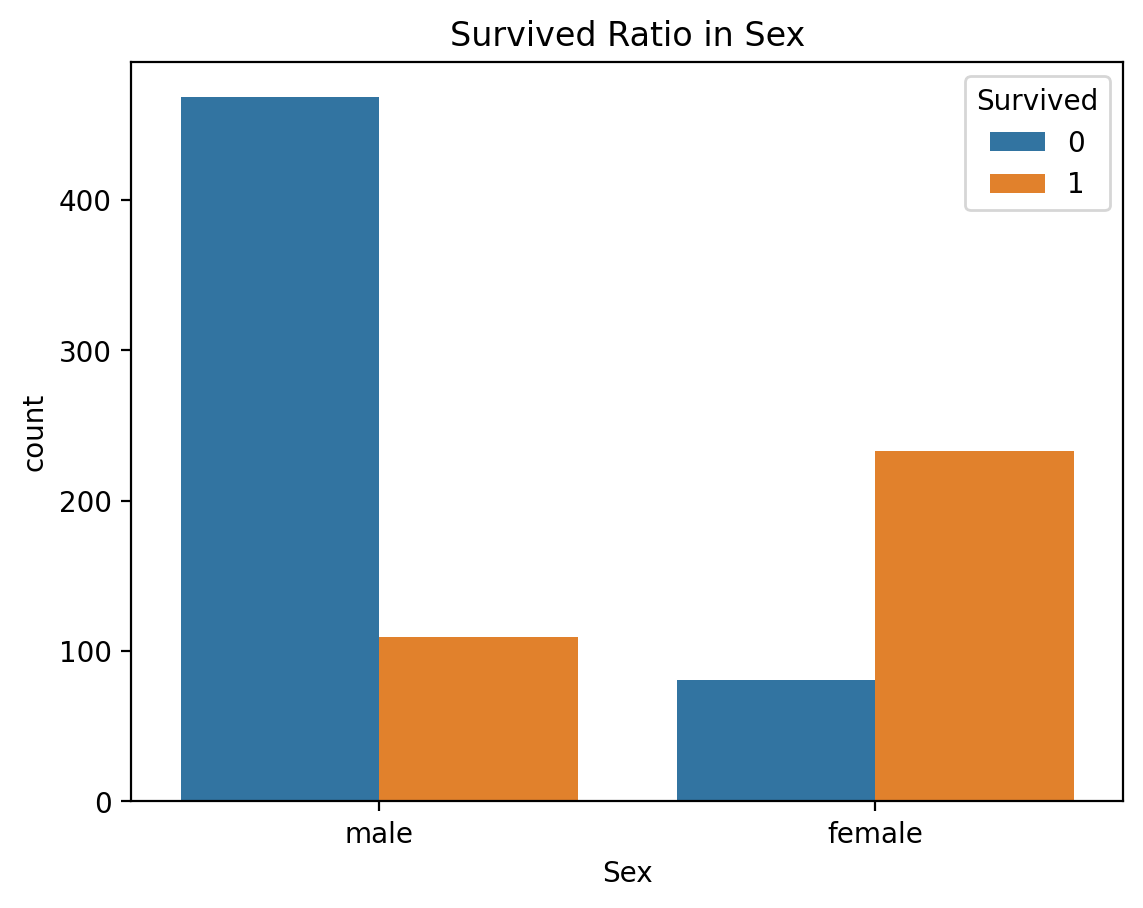

In [24]:
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survived Ratio in Sex")
plt.show()

=> 탑승객 중 남성이 여성보다 훨씬 많음에도 불구하고, 생존자는 남성보다 여성이 더 많음.
<br>도메인 배경 지식에서 알아봤듯이, 'Lady First'가 실제로 있었다는 것을 알 수 있음.

**성별에 따른 생존 비율이 상이한 걸로 보아, 모델링에 사용할 예정임.**

#### Pclass내 Sex의 비율

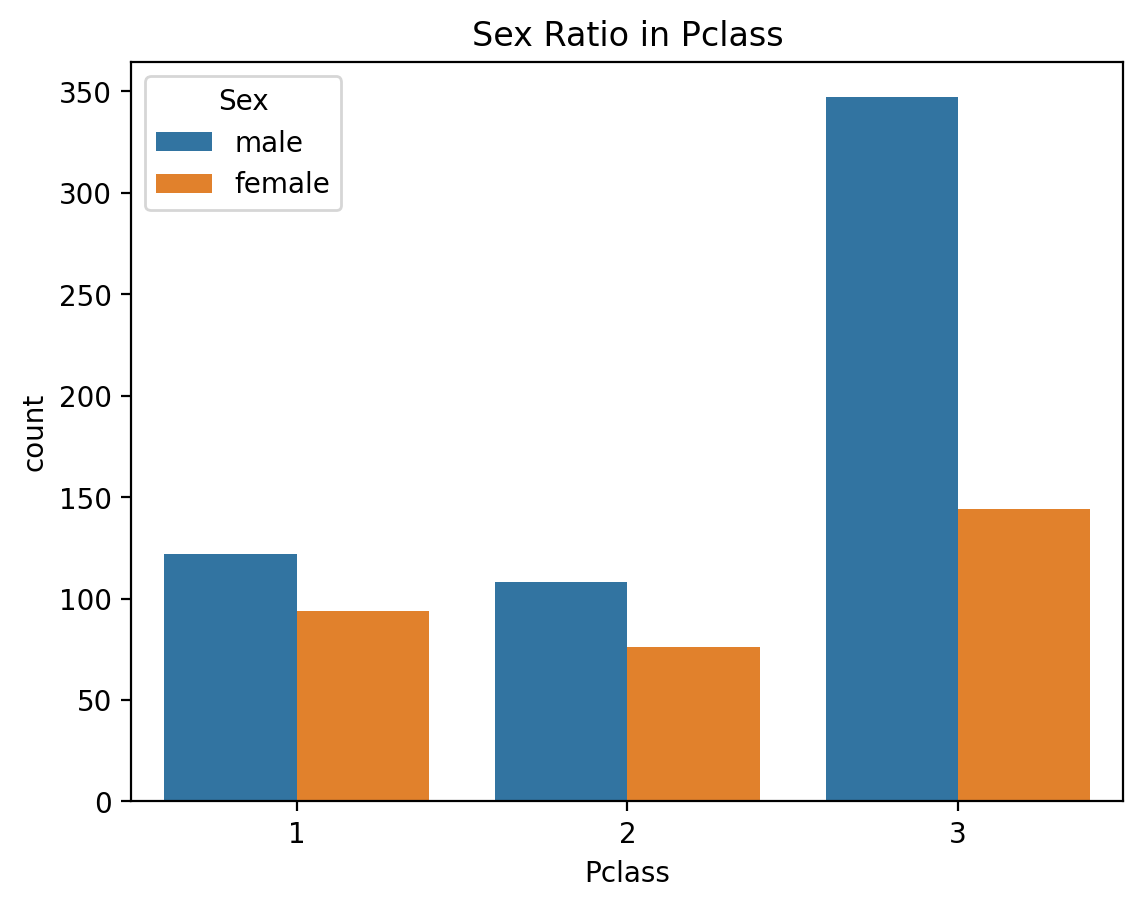

In [25]:
sns.countplot(x="Pclass", hue="Sex", data=data)
plt.title("Sex Ratio in Pclass")
plt.show()

=> 1,2등석은 남녀의 비율이 비슷한데, 3등석에서 남자가 여자보다 훨씬 더 많은게 보임.

### Ticket
티켓 번호

In [26]:
#해당 변수의 값별 갯수 확인
data["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [27]:
#2개 이상의 티켓 번호 출력
data["Ticket"].value_counts().loc[lambda x : x > 1]

347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
248738             2
12749              2
19996              2
S.C./PARIS 2079    2
349237             2
Name: Ticket, Length: 134, dtype: int64

=> 가족, 친구, 연인 단위로 티켓을 동시에 구매하면 동일한 번호를 받는 듯 함.
<br>보통 앞에 알파벳이 있는데 객실과 관련이 있는지?

In [28]:
data["Ticket"].value_counts().head(40)

347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
349909           4
113760           4
4133             4
113781           4
W./C. 6608       4
2666             4
19950            4
347077           4
C.A. 31921       3
PC 17572         3
C.A. 34651       3
363291           3
F.C.C. 13529     3
345773           3
248727           3
24160            3
29106            3
SC/Paris 2123    3
35273            3
371110           3
230080           3
PC 17760         3
239853           3
PC 17582         3
347742           3
110152           3
13502            3
110413           3
PC 17755         3
Name: Ticket, dtype: int64

=> Cabin(객실 번호)의 결측치를 채울 때, Ticket의 정보가 도움이 되지 않을까 싶음.

### Cabin
객실 번호

In [29]:
data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

=> 앞의 알파벳은 객실과 관련있어 보이고, 뒤의 숫자는 좌석번호와 관련있어 보임.

### Embarked
탑승한 항구

In [30]:
#해당 변수의 값별 갯수 확인
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

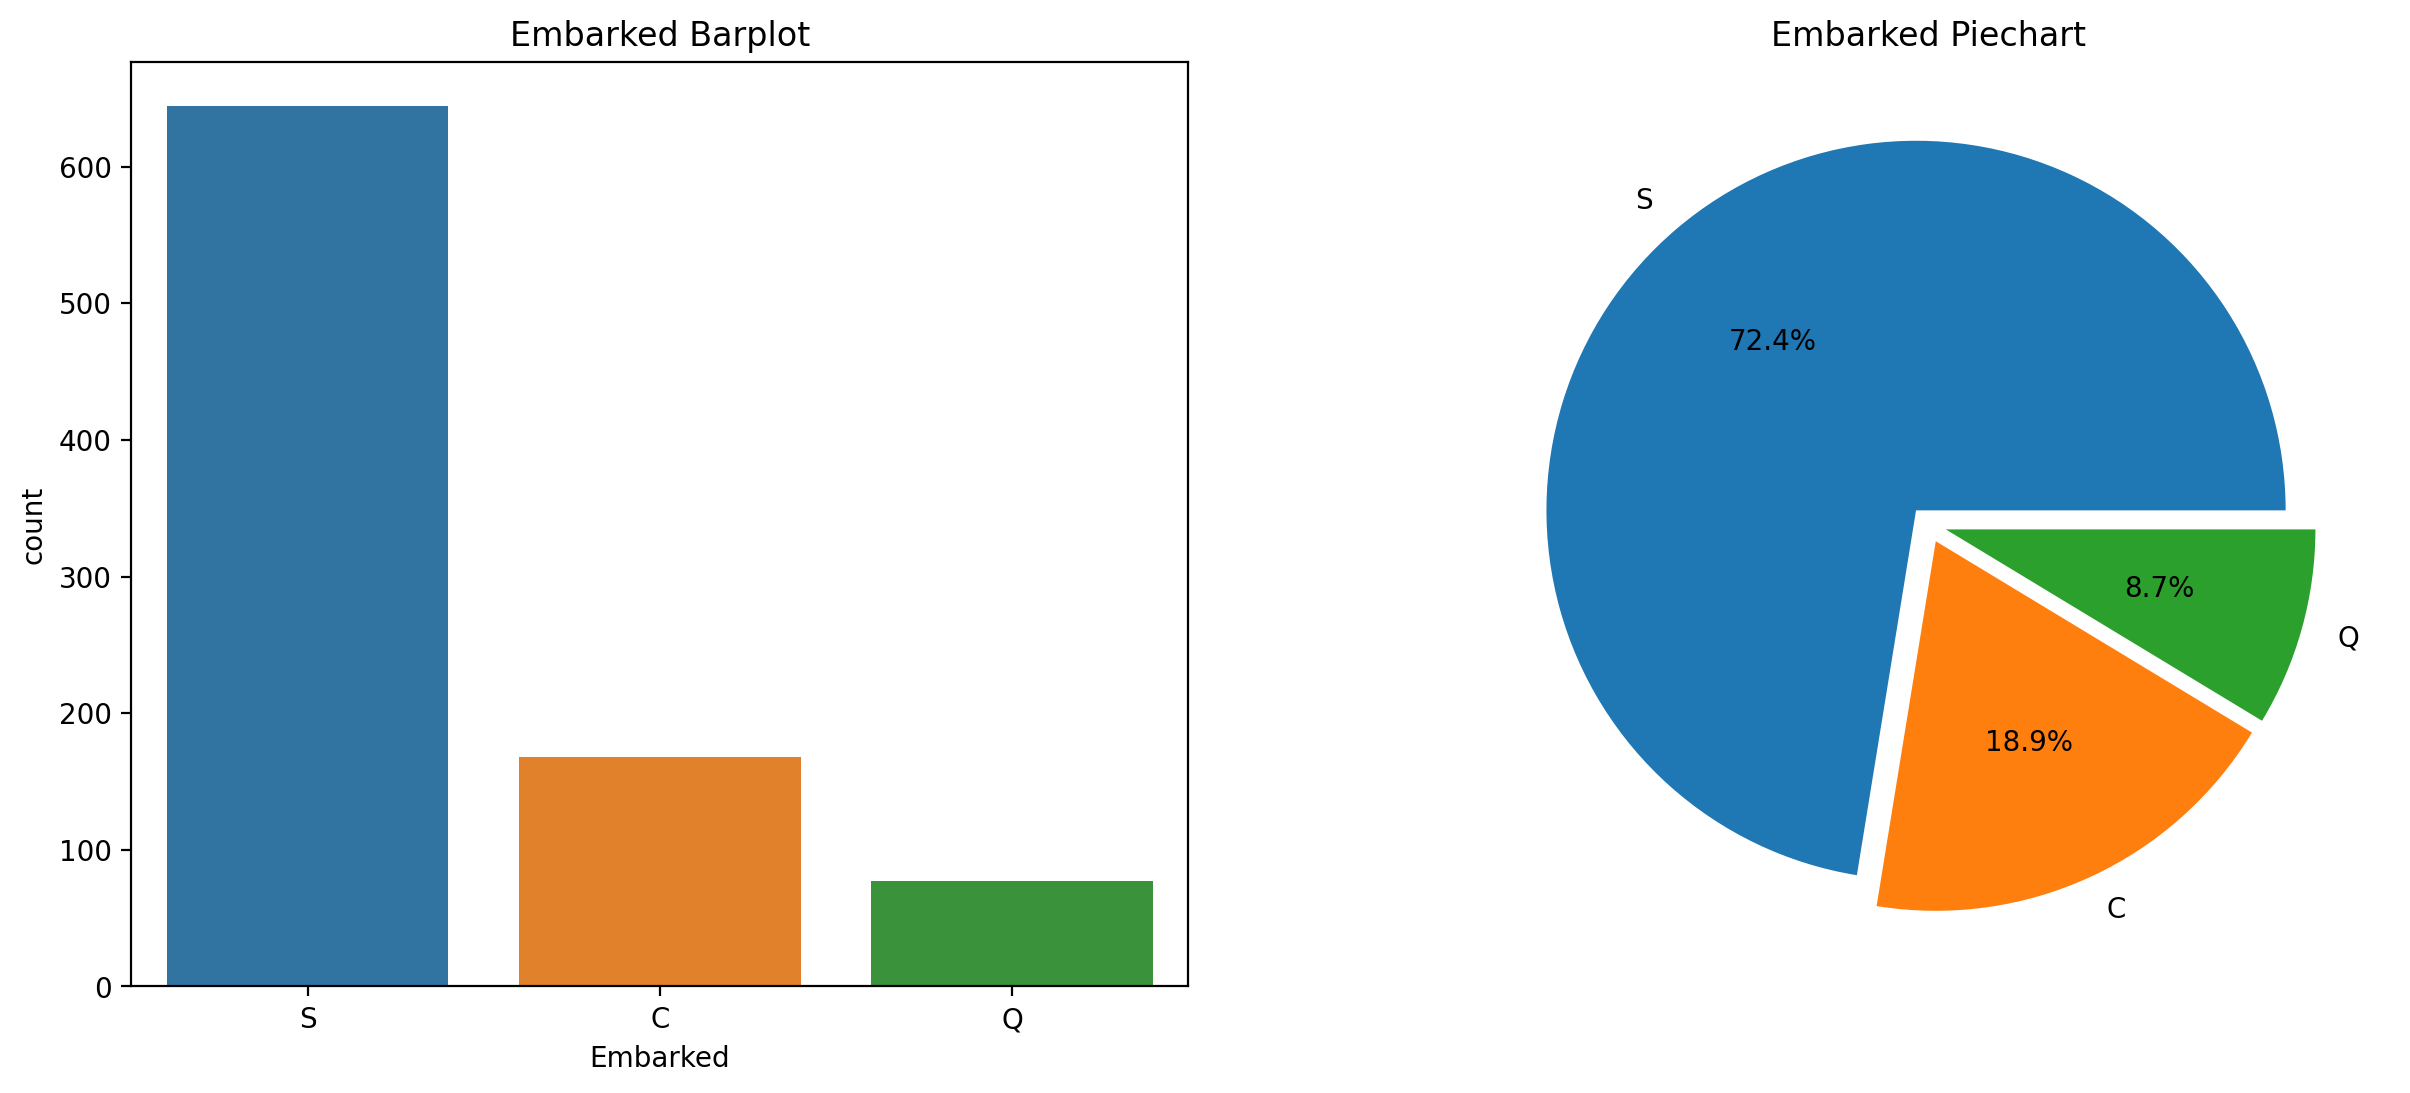

In [31]:
#막대그래프와 파이차트로 탑승한 항구의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["Embarked"], ax=ax[0])
ax[0].set_title("Embarked Barplot")

data["Embarked"].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Embarked Piechart")
ax[1].set_ylabel("")

plt.show()

=> S(Southampton) > C(Cherbourg) > Q(Queenstown) 이고, 비율은 약 7:2:1임.

#### Embarked에 따른 Survived 비율

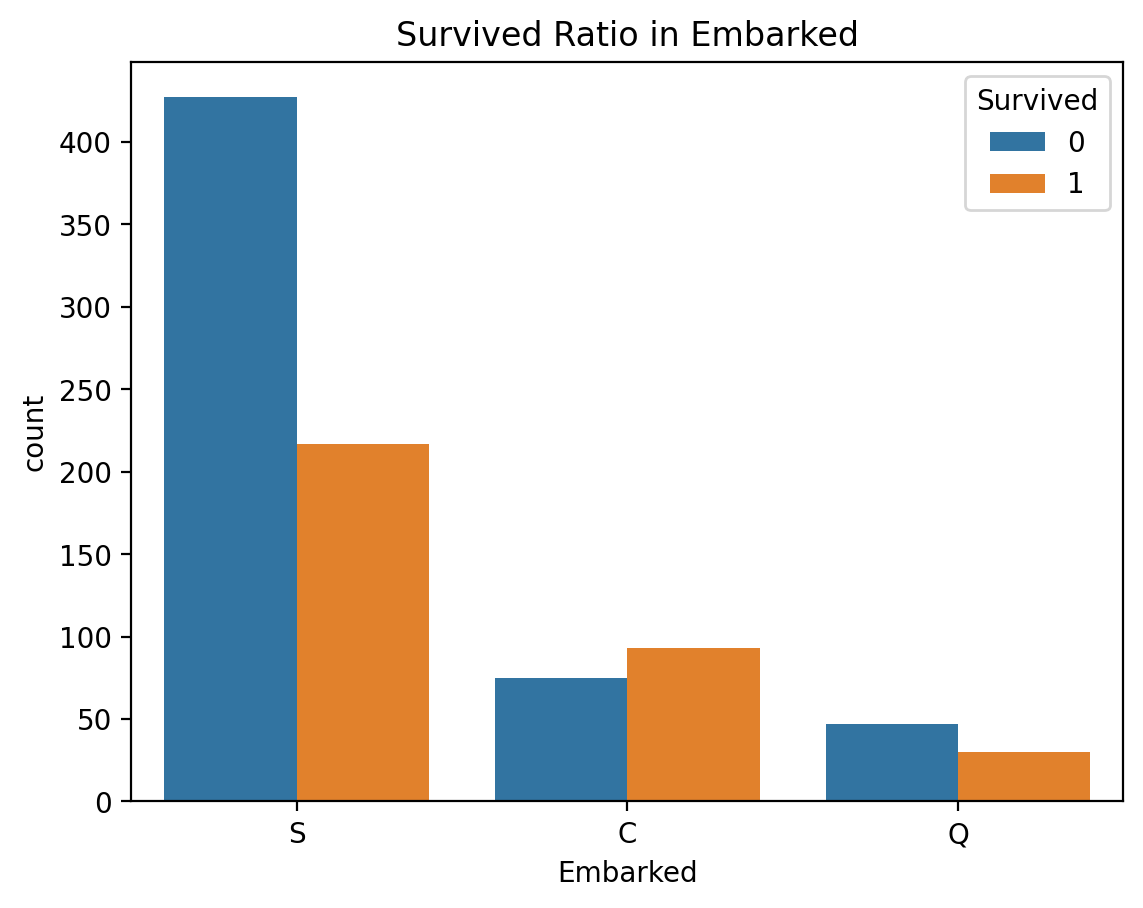

In [32]:
sns.countplot(x="Embarked", hue="Survived", data=data)
plt.title("Survived Ratio in Embarked")
plt.show()

=> C(Cherbourg)에서 생존자 > 사망자이고 생존률이 높음을 알 수 있음. 그다음으로 높은 생존률은 Q(Queenstown), S(Southampton)임.

<br>**WHY?**
- Cherbourg가 첫 번째 기항지이고, 비교적 많은 1등석 승객들이 그곳에서 승선했을 가능성이 있음.
- Cherbourg는 프랑스 항구로서, 프랑스 승객(이곳에서 승선했으면 프랑스인일 가능성이 높으니까)을 구하려는 편견이 작용했을 수 있음.

#### Embarked 내 Pclass 비율 

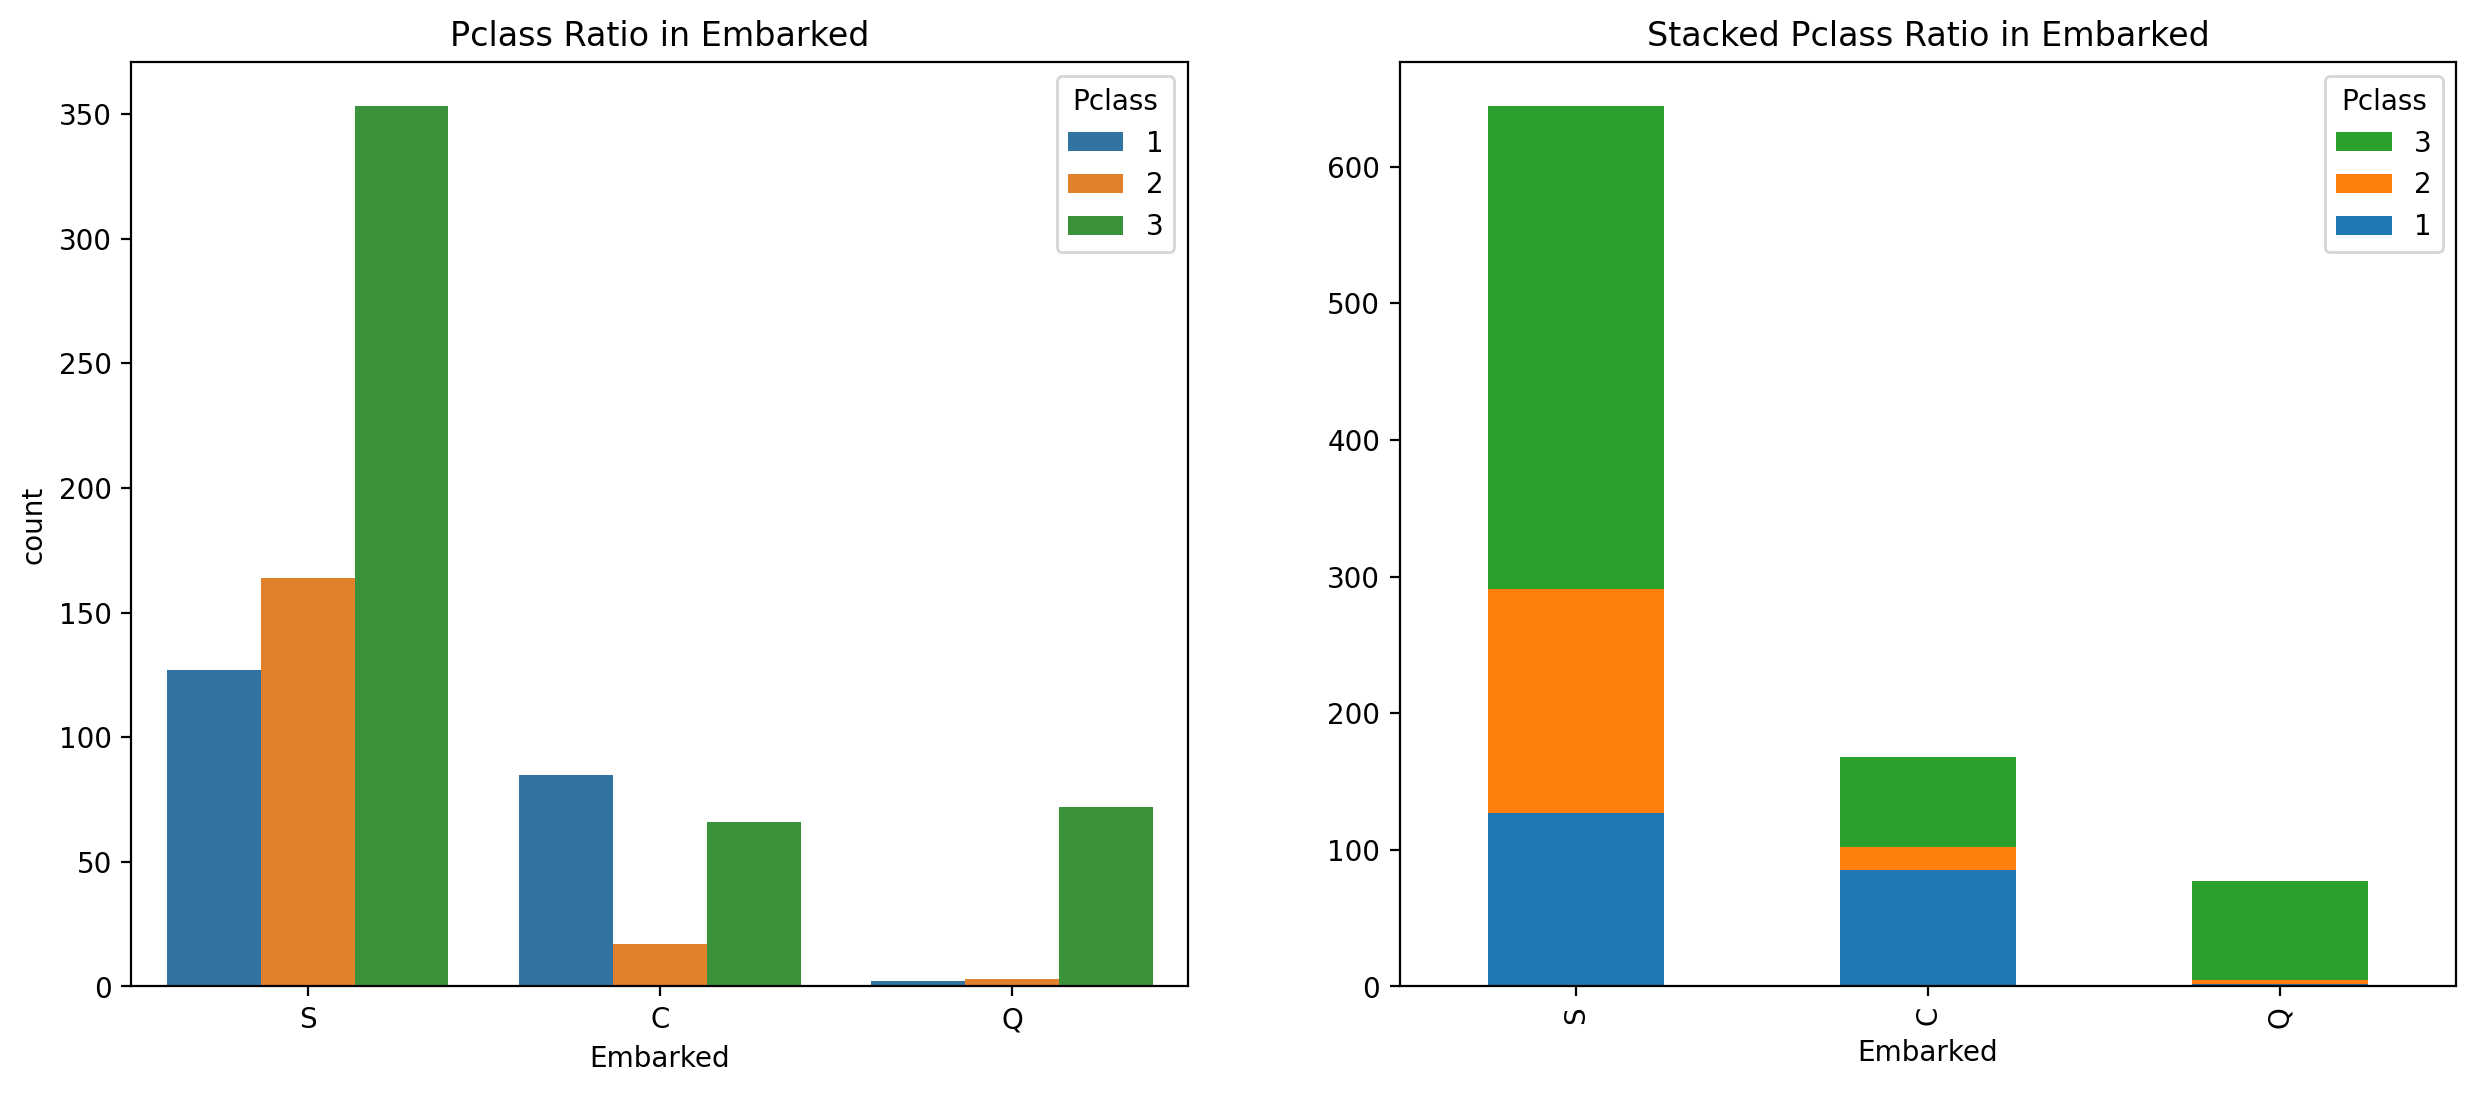

In [33]:
f, ax = plt.subplots(1, 2, figsize=(15,6))

#기본 막대그래프
sns.countplot(x="Embarked", hue="Pclass", data=data, ax=ax[0])
ax[0].set_title("Pclass Ratio in Embarked")

#비율 확인을 위한 누적 막대그래프
data_group = data.groupby(["Embarked","Pclass"])["Pclass"].count().unstack("Pclass")
data_group = data_group.reindex(["S","C","Q"]) #index 재정렬
data_group.plot(kind="bar", stacked=True, legend="reverse", ax=ax[1])
ax[1].set_title("Stacked Pclass Ratio in Embarked")

plt.show()

=> Southampton에는 모든 등급의 승객이 가장 많지만 비율 상으로는 3등석 승객이 가장 많음.
<br>Cherbourg에는 1등급 승객의 비율이 가장 높음.
<br>Queenstown에는 3등급 승객의 비율이 거의 대부분을 차지함.

## 수치형 변수
수치형 변수로는 Age, SibSp, Parch, Fare가 있음.

### Age
승객의 나이

In [34]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

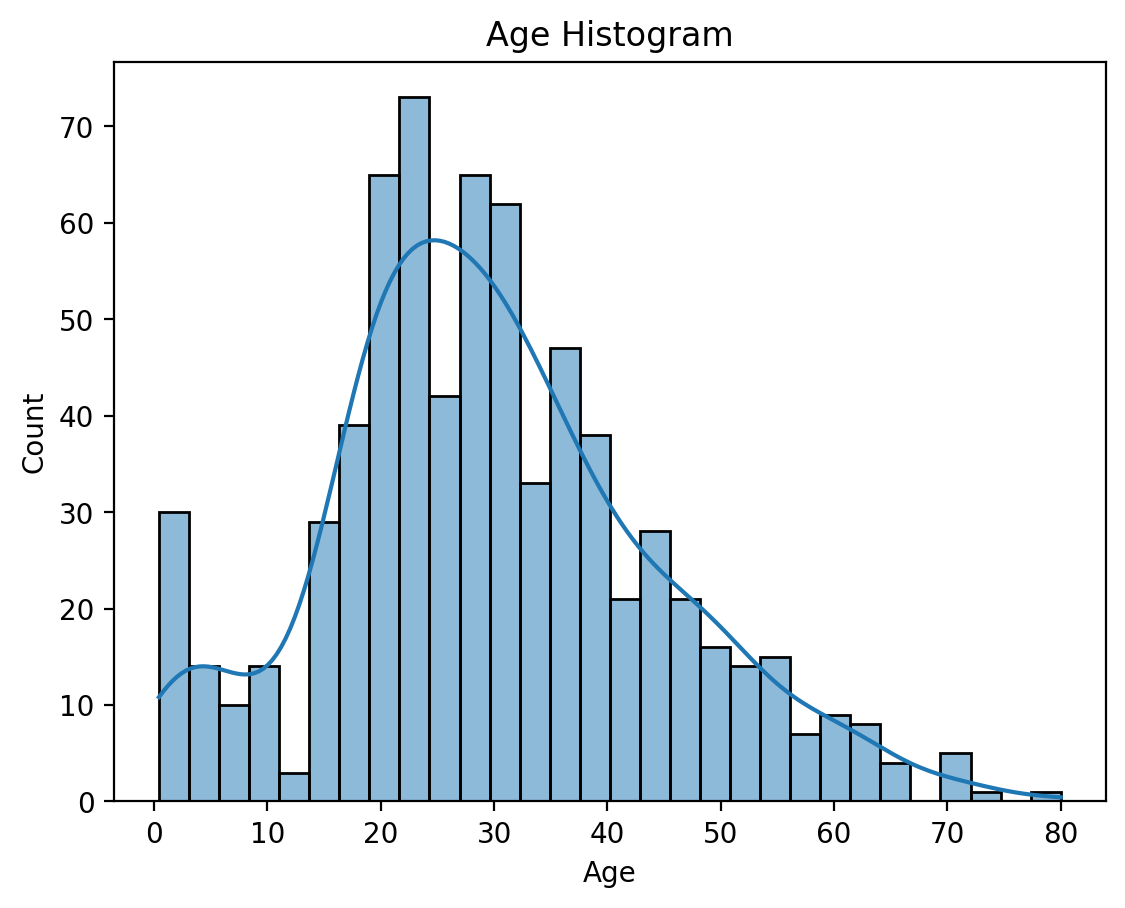

In [35]:
#sns을 이용한 히스토그램
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Age Histogram")
plt.show()

#### Age에 따른 Survived 비율

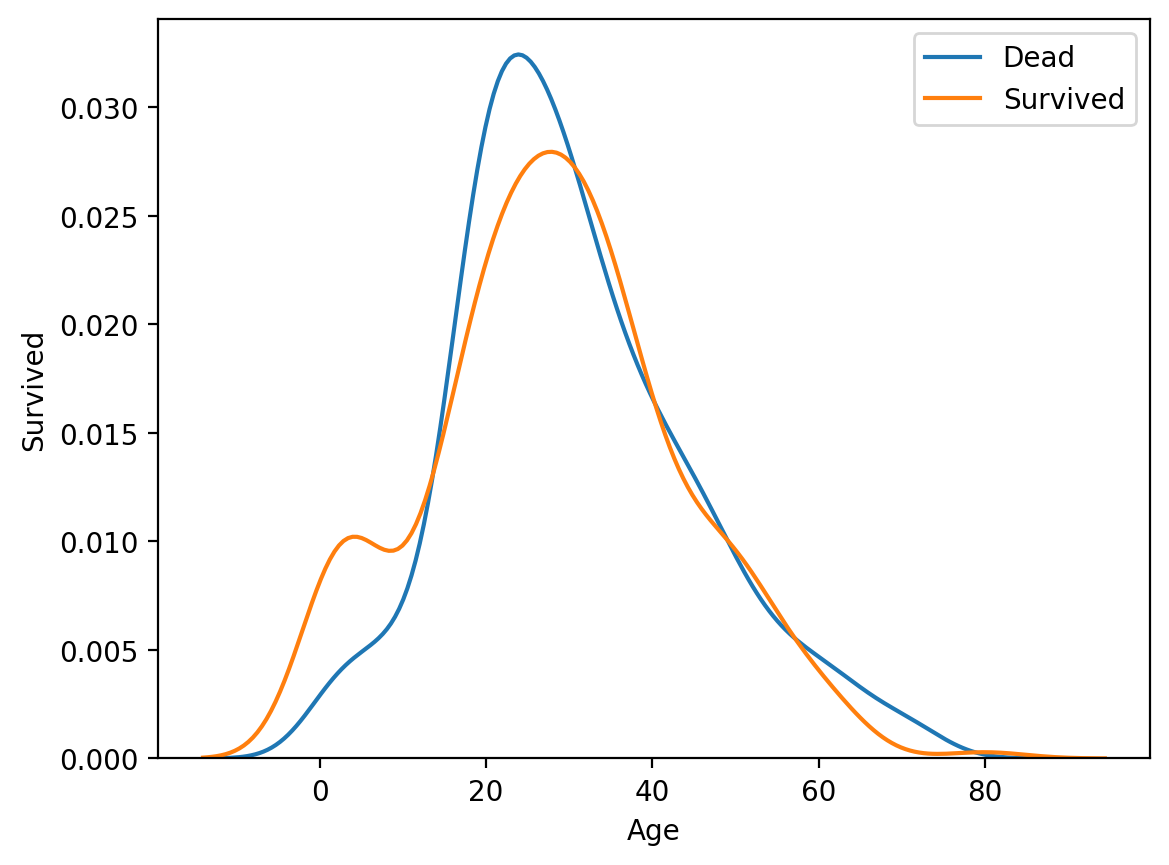

In [36]:
#커널밀도그래프(비율 히스토그램)
sns.kdeplot(data[data['Survived'] == 0]['Age'])
sns.kdeplot(data[data['Survived'] == 1]['Age'])
plt.legend(["Dead","Survived"])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

=> 타 연령대에 비해 15세 미만의 어린이들은 생존률이 높았고, 20~30대는 사망률이 높았음.

### SibSp
함께 탑승한 형제,자매 또는 배우자의 수

In [37]:
data["SibSp"].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

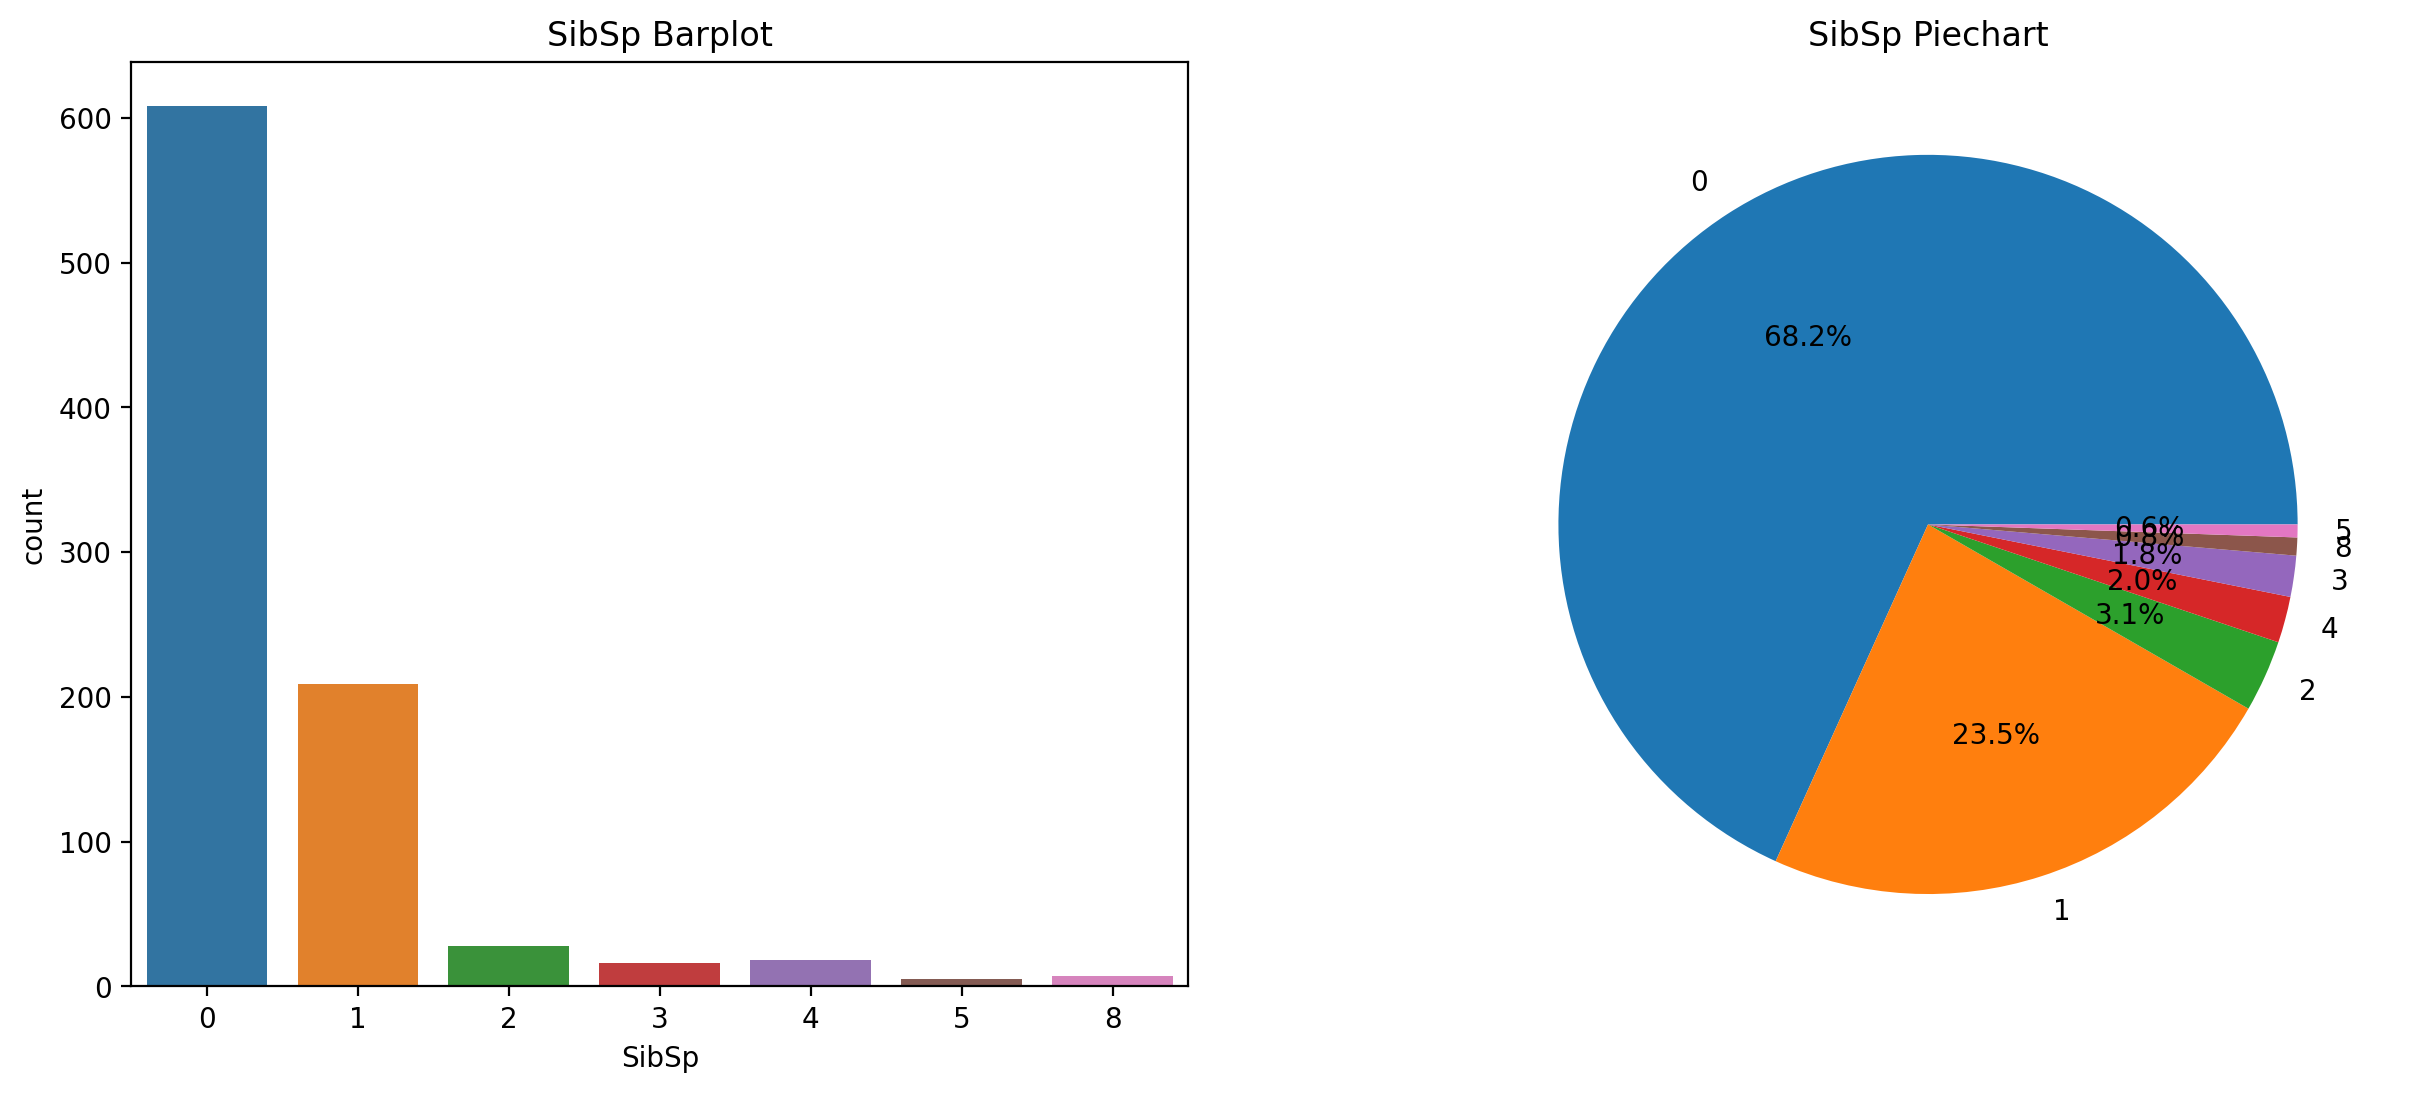

In [38]:
#막대그래프와 파이차트로 SibSp의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["SibSp"], ax=ax[0])
ax[0].set_title("SibSp Barplot")

data["SibSp"].value_counts().plot.pie(autopct='%.1f%%', ax=ax[1])
ax[1].set_title("SibSp Piechart")
ax[1].set_ylabel("")

plt.show()

=> 형제,자매 또는 배우자 없이 탑승한 승객이 약 70%이고, 2명 이상 동반 탑승한 승객은 약 8%에 불과함.

#### SibSp에 따른 Survived 비율

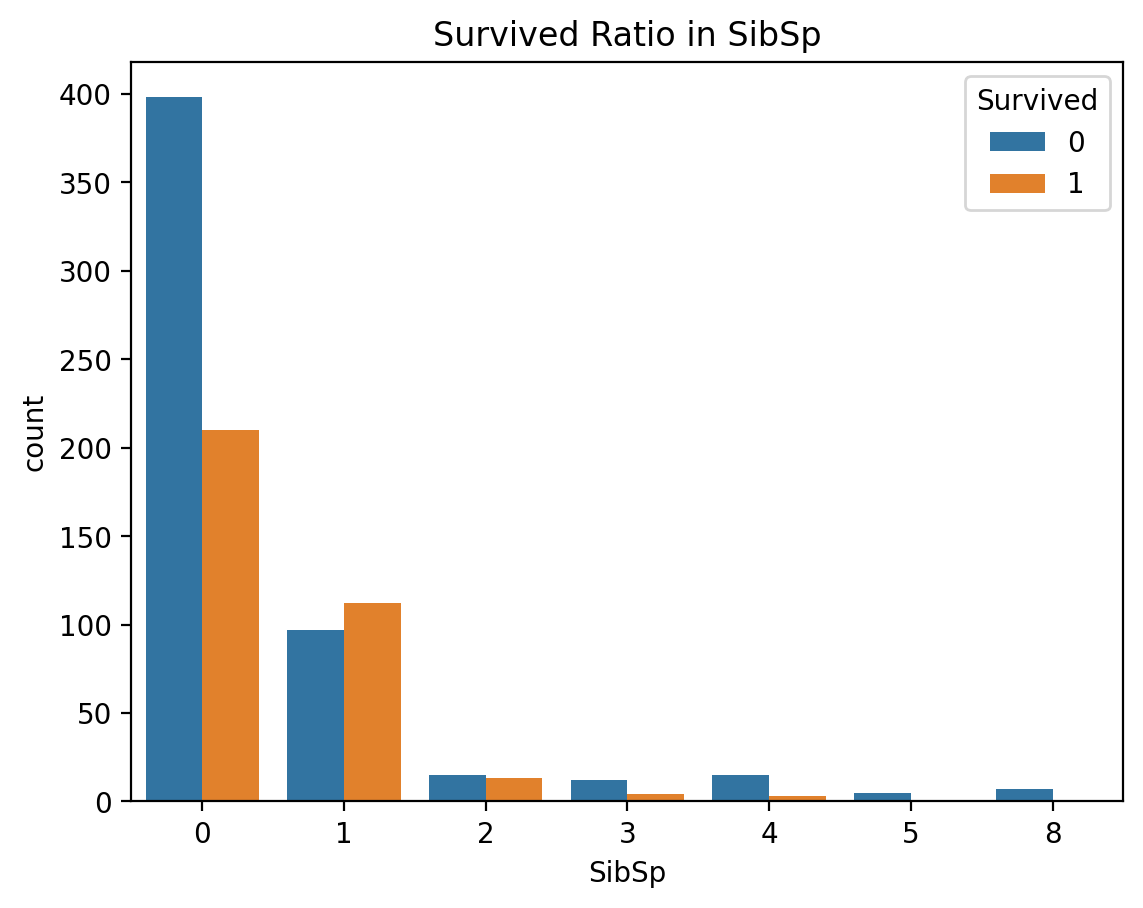

In [39]:
sns.countplot(x="SibSp", hue="Survived", data=data)
plt.title("Survived Ratio in SibSp")
plt.show()

=> SibSp가 1명인 승객의 생존률이 가장 높았고, 혼자 탑승한 승객의 생존률이 그리 높지 않음. 

### Parch
함께 탑승한 부모 또는 자녀의 수

In [40]:
data["Parch"].value_counts().sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

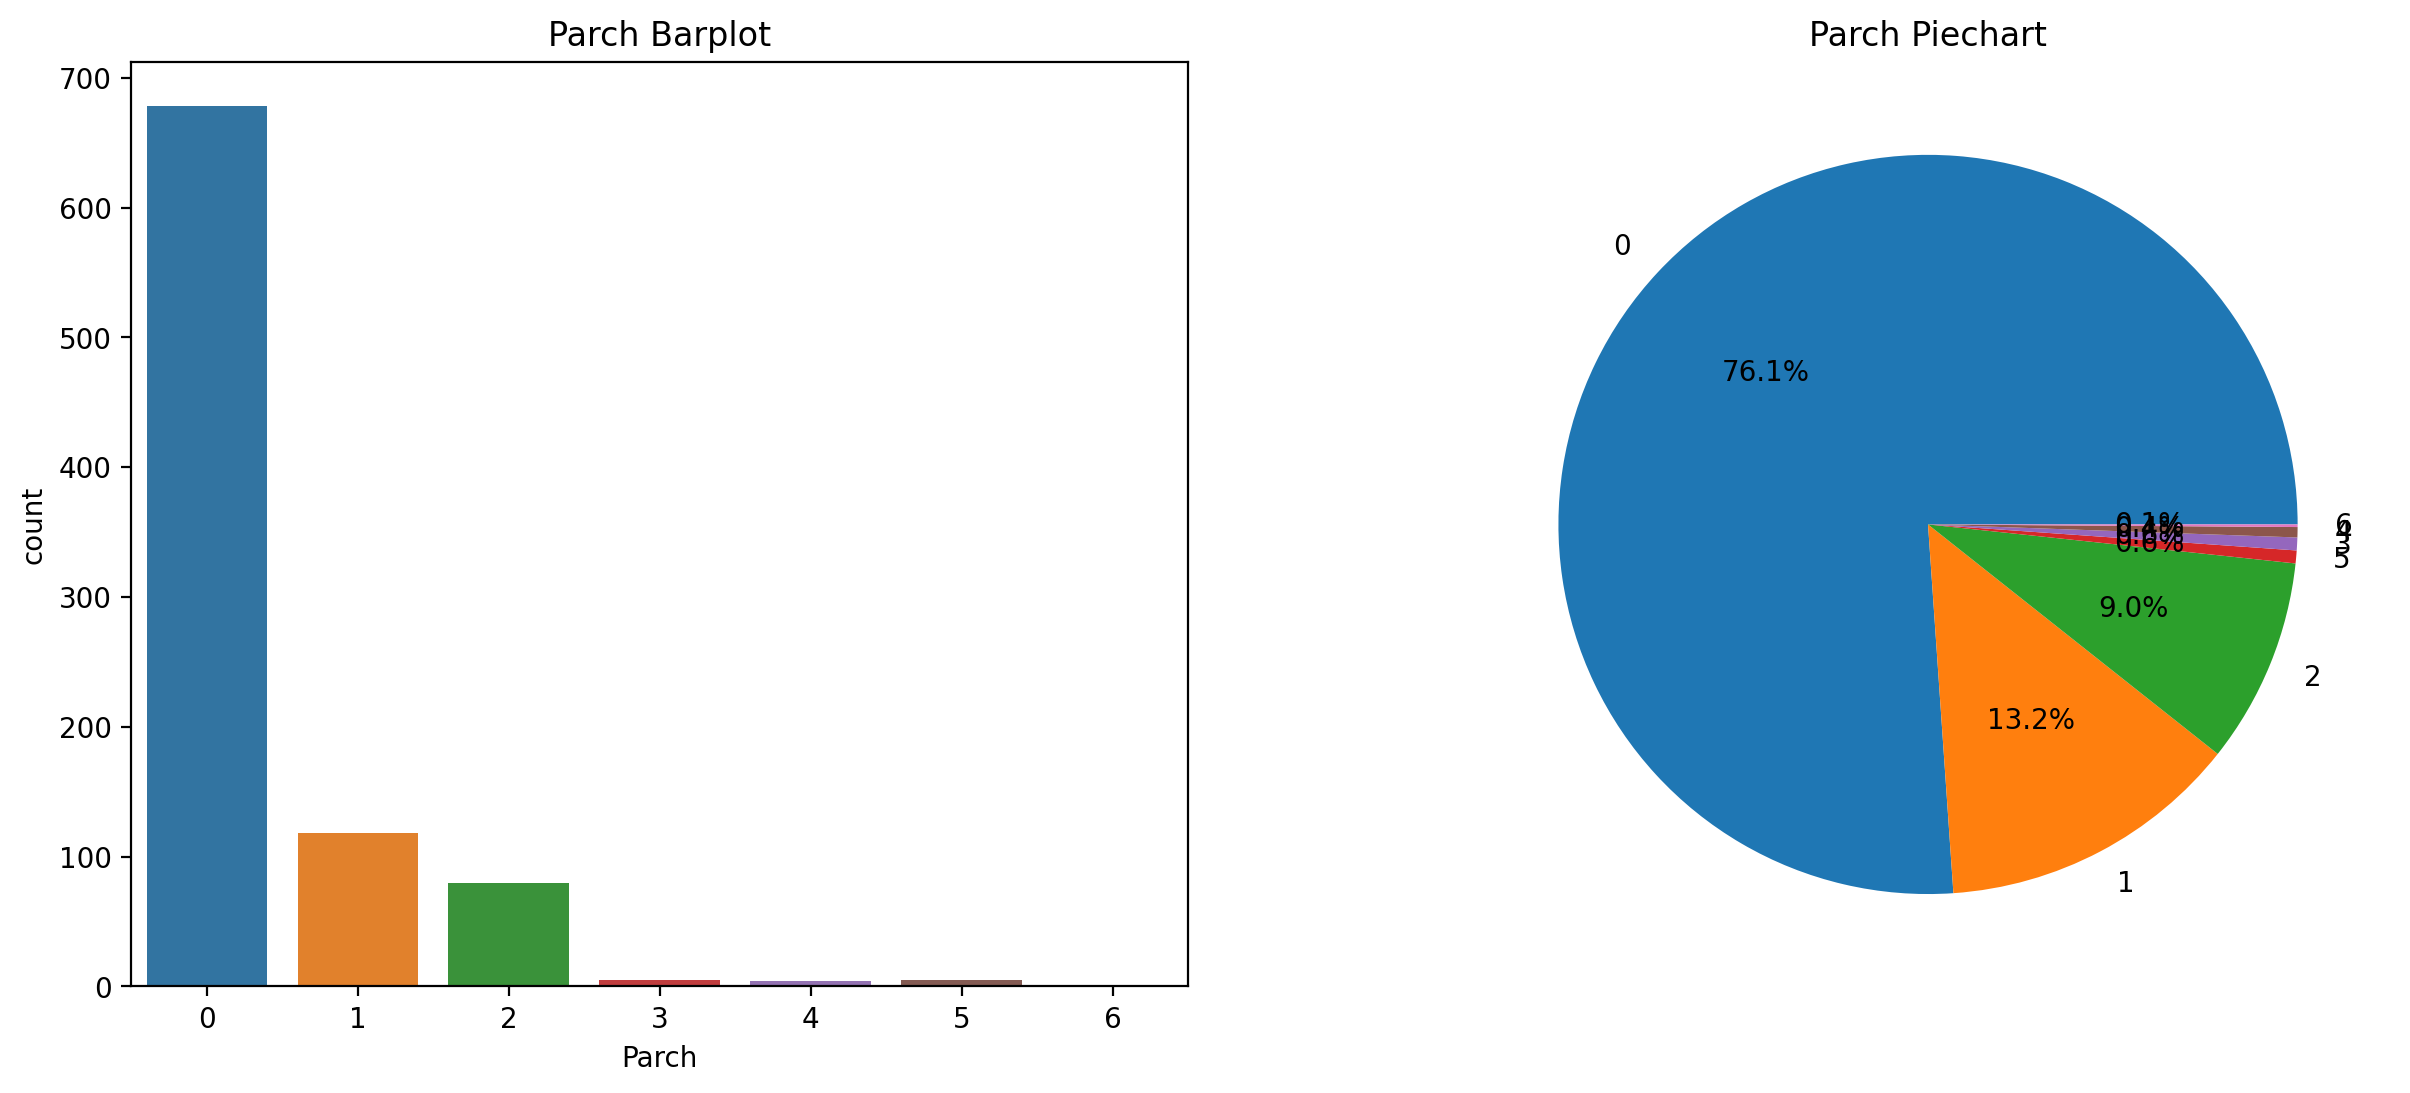

In [41]:
#막대그래프와 파이차트로 Parch의 비율 확인
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x=data["Parch"], ax=ax[0])
ax[0].set_title("Parch Barplot")

data["Parch"].value_counts().plot.pie(autopct='%.1f%%', ax=ax[1])
ax[1].set_title("Parch Piechart")
ax[1].set_ylabel("")

plt.show()

=> 부모 또는 자녀없이 탑승한 승객의 비율이 약 76%이고, 2명 이상 동반 탑승한 승객은 약 10%임.

#### Parch에 따른 Survived 비율

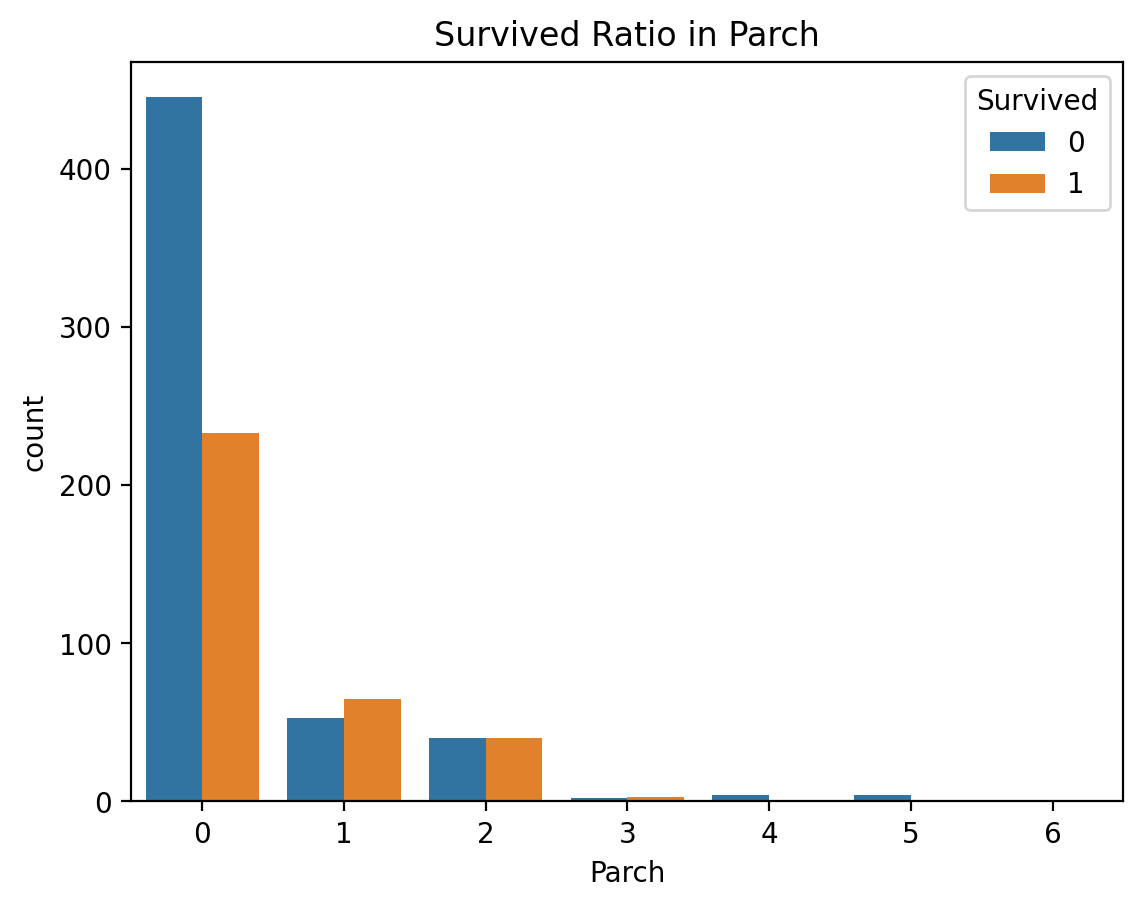

In [42]:
sns.countplot(x="Parch", hue="Survived", data=data)
plt.title("Survived Ratio in Parch")
plt.show()

=> SibSp 경우와 유사하게 Parch가 1,2,3일 때의 생존률이 높았고, 혼자 탑승한 승객의 생존률이 그리 좋지 않음.

**적당한 수의 동반 탑승객이 혼자 탑승한 승객들보다 생존률이 높음.**

### Fare
지불한 운임 요금

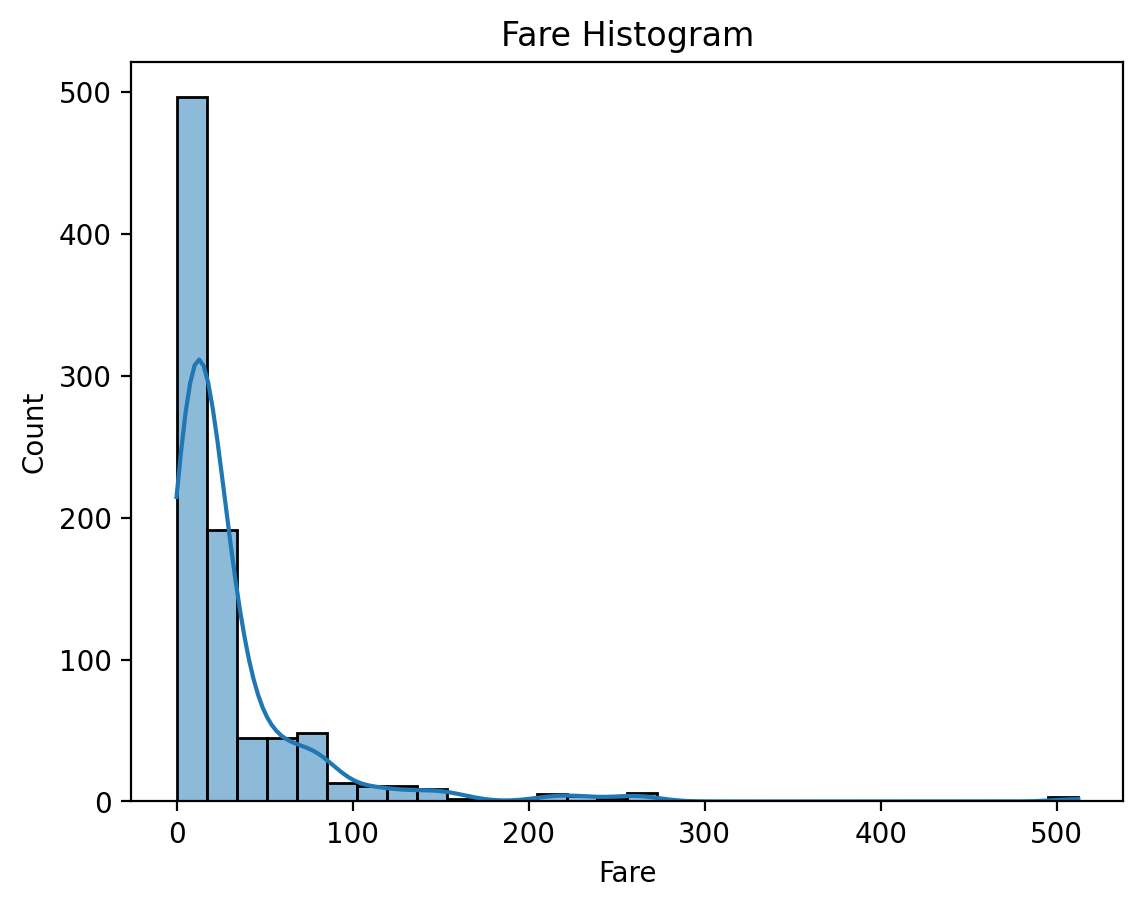

In [43]:
#sns을 이용한 히스토그램
sns.histplot(data["Fare"], bins=30, kde=True)
plt.title("Fare Histogram")
plt.show()

#### Fare에 따른 Survived 비율

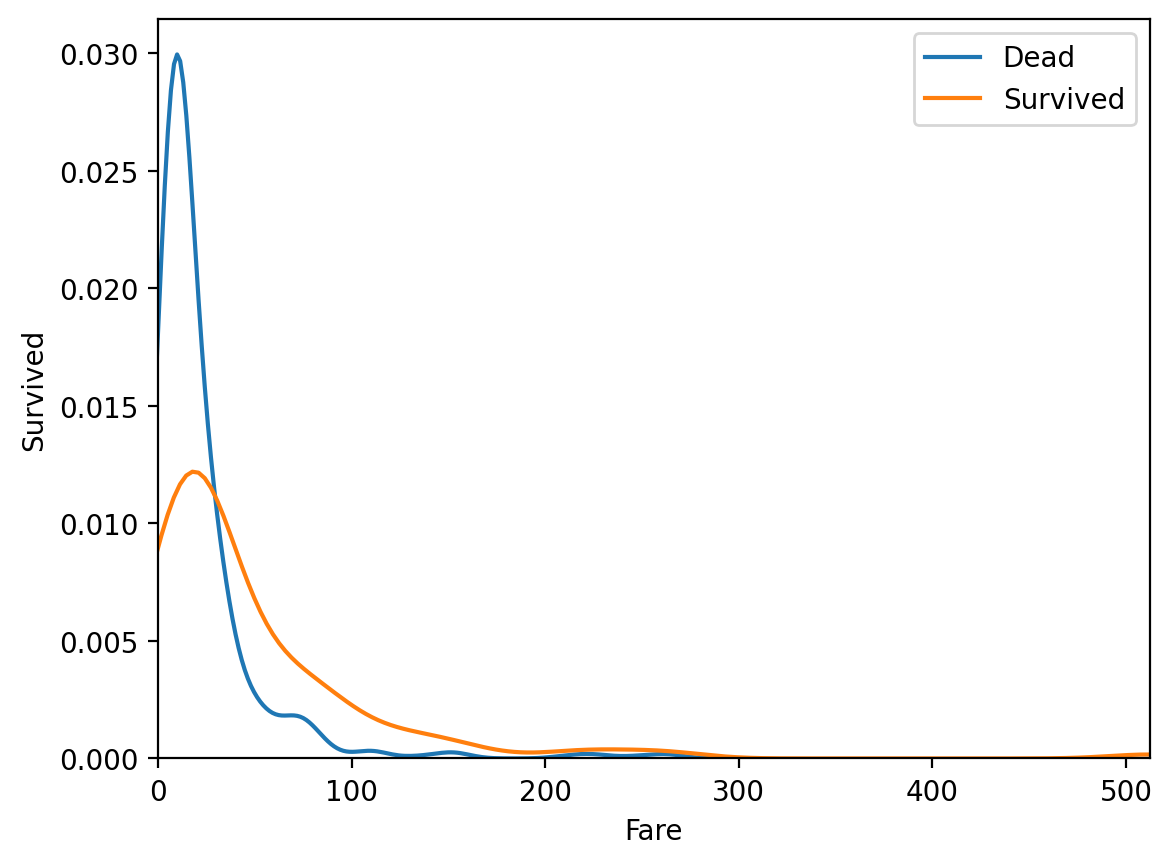

In [44]:
#커널밀도그래프(비율 히스토그램)
sns.kdeplot(data[data['Survived'] == 0]['Fare'])
sns.kdeplot(data[data['Survived'] == 1]['Fare'])
plt.legend(["Dead","Survived"])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.xlim(0, data["Fare"].max())
plt.show()

=> 운임 요금이 비교적 비싼 승객들의 생존률이 더 높았음.

# 1차 전처리
- 파생변수 생성
- 결측치 처리
- 이상치 처리
- 변수 변환

## 파생변수 생성 

### Name - Surname, Title, Firstname
Name에서 성, 호칭, 이름을 분리함

In [45]:
data["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [46]:
#Name에서 Surname, Title, Firstname을 분리해주는 함수 생성
def Name_split(name):
    
    Surname, Title, Firstname = name.split(",")[0], name.split(",")[1].split(".")[0][1:], name.split(",")[1].split(".")[1][1:]
    return Surname, Title, Firstname

In [47]:
#Name_split 함수 적용 후, 리스트에 저장
Surname_list = []
Title_list = []
Firstname_list = []

for i in range(len(data)):
    Surname_list.append(Name_split(data["Name"][i])[0])
    Title_list.append(Name_split(data["Name"][i])[1])
    Firstname_list.append(Name_split(data["Name"][i])[2])


#데이터프레임에 새로운 열 생성
data_v1 = data.copy() #원본 데이터 보존을 위해 얕은 복사 실행
data_v1.insert(loc=4, column="Surname", value=Surname_list)
data_v1.insert(loc=5, column="Title", value=Title_list)
data_v1.insert(loc=6, column="Firstname", value=Firstname_list)
data_v1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name    Surname Title  \
0                              Braund, Mr. Owen Harris     Braund    Mr   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings   Mrs   
2                               Heikkinen, Miss. Laina  Heikkinen  Miss   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle   Mrs   
4                             Allen, Mr. William Henry      Allen    Mr   
..                                                 ...        ...   ...   
886                              Montvila, Rev. Juozas   Montvila   Rev   
887                       Graham, Miss. Margaret Edith     Graham  Miss   
888           Johnston, Miss. Catherine Helen "Carrie"   Johnston  Miss   
889                              Behr, Mr. Karl Howell       Behr    Mr   
890                                Dooley, Mr. Patrick     Dooley    Mr   

                                 Firstname     Sex   Age  SibSp  Parch  \
0                              Owen Harris    male  22.0      1      0   
1    John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
2                                    Laina  female  26.0      0      0   
3            Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                            William Henry    male  35.0      0      0   
..                                     ...     ...   ...    ...    ...   
886                                 Juozas    male  27.0      0      0   
887                         Margaret Edith  female  19.0      0      0   
888               Catherine Helen "Carrie"  female   NaN      1      2   
889                            Karl Howell    male  26.0      0      0   
890                                Patrick    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  
0           A/5 21171   7.2500   NaN        S  
1            PC 17599  71.2833   C85        C  
2    STON/O2. 3101282   7.9250   NaN        S  
3              113803  53.1000  C123        S  
4              373450   8.0500   NaN        S  
..                ...      ...   ...      ...  
886            211536  13.0000   NaN        S  
887            112053  30.0000   B42        S  
888        W./C. 6607  23.4500   NaN        S  
889            111369  30.0000  C148        C  
890            370376   7.7500   NaN        Q  

[891 rows x 15 columns]

In [48]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

=> data는 그대로 원본을 유지하면서, data_v1에만 새로운 열을 추가함.

In [49]:
#Title(호칭)의 종류와 갯수 확인
data_v1["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [50]:
#성별 Title(호칭) 갯수 확인
data_v1.groupby(["Sex","Title"])["Title"].count().unstack("Title")

Title   Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  Mme  \
Sex                                                                            
female   NaN  NaN  NaN  1.0       NaN   1.0    NaN     NaN  182.0   2.0  1.0   
male     1.0  2.0  1.0  6.0       1.0   NaN    2.0    40.0    NaN   NaN  NaN   

Title      Mr    Mrs   Ms  Rev  Sir  the Countess  
Sex                                                
female    NaN  125.0  1.0  NaN  NaN           1.0  
male    517.0    NaN  NaN  6.0  1.0           NaN

=> 여성은 Miss와 Mrs를 많이 사용하고, 남성은 Mr와 Master를 많이 사용함.
- Miss, Mrs, Mr, Master를 제외한 나머지는 Others로 병합.
- Mlle, Ms는 Miss로, Mme, Lady, Dona는 Mrs로, Don은 Mr로 바꿈.

In [51]:
#Title 호칭 재분류
data_v1["Title"].replace(["Capt","Col","Dr","Jonkheer","Major","Rev","Sir","the Countess"], "Others", inplace=True)
data_v1["Title"].replace(["Mlle","Ms"], "Miss", inplace=True)
data_v1["Title"].replace(["Mme","Lady","Dona"], "Mrs", inplace=True)
data_v1["Title"].replace("Don", "Mr", inplace=True)

data_v1["Title"].value_counts()

Mr        518
Miss      185
Mrs       127
Master     40
Others     21
Name: Title, dtype: int64

#### Title별 Survived 비율

In [52]:
data_v1[["Title","Survived"]].groupby("Title").mean().sort_values(by="Survived", ascending=False)

Survived
Title           
Mrs     0.795276
Miss    0.702703
Master  0.575000
Others  0.333333
Mr      0.156371

=> 대체적으로 여성들의 생존률이 높았고(특히 기혼여성인 Mrs), 그다음으로 어린이, 남성 순임.

### SibSp & Parch - FamilySize
동반한 가족수를 의미하는 SibSp와 Parch를 합침.

In [53]:
#SibSp와 Parch 열을 합쳐서 FamilySize라는 새로운 열 생성
data_v1["FamilySize"] = data_v1["SibSp"] + data_v1["Parch"]
data_v1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name    Surname   Title  \
0                              Braund, Mr. Owen Harris     Braund      Mr   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings     Mrs   
2                               Heikkinen, Miss. Laina  Heikkinen    Miss   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle     Mrs   
4                             Allen, Mr. William Henry      Allen      Mr   
..                                                 ...        ...     ...   
886                              Montvila, Rev. Juozas   Montvila  Others   
887                       Graham, Miss. Margaret Edith     Graham    Miss   
888           Johnston, Miss. Catherine Helen "Carrie"   Johnston    Miss   
889                              Behr, Mr. Karl Howell       Behr      Mr   
890                                Dooley, Mr. Patrick     Dooley      Mr   

                                 Firstname     Sex   Age  SibSp  Parch  \
0                              Owen Harris    male  22.0      1      0   
1    John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
2                                    Laina  female  26.0      0      0   
3            Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                            William Henry    male  35.0      0      0   
..                                     ...     ...   ...    ...    ...   
886                                 Juozas    male  27.0      0      0   
887                         Margaret Edith  female  19.0      0      0   
888               Catherine Helen "Carrie"  female   NaN      1      2   
889                            Karl Howell    male  26.0      0      0   
890                                Patrick    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  FamilySize  
0           A/5 21171   7.2500   NaN        S           1  
1            PC 17599  71.2833   C85        C           1  
2    STON/O2. 3101282   7.9250   NaN        S           0  
3              113803  53.1000  C123        S           1  
4              373450   8.0500   NaN        S           0  
..                ...      ...   ...      ...         ...  
886            211536  13.0000   NaN        S           0  
887            112053  30.0000   B42        S           0  
888        W./C. 6607  23.4500   NaN        S           3  
889            111369  30.0000  C148        C           0  
890            370376   7.7500   NaN        Q           0  

[891 rows x 16 columns]

#### FamilySize에 따른 Survived 비율

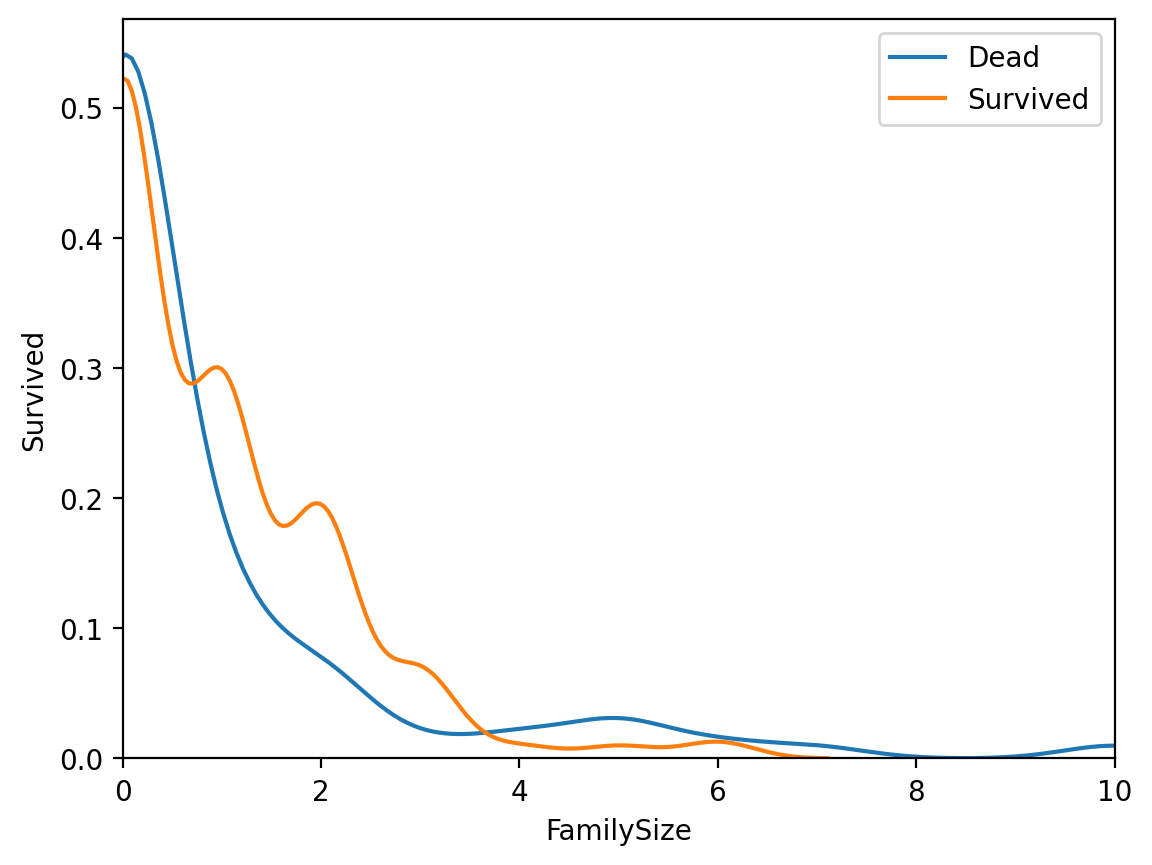

In [54]:
#커널밀도그래프(비율 히스토그램)
sns.kdeplot(data_v1[data_v1['Survived'] == 0]['FamilySize'])
sns.kdeplot(data_v1[data_v1['Survived'] == 1]['FamilySize'])
plt.legend(["Dead","Survived"])
plt.xlabel('FamilySize')
plt.ylabel('Survived')
plt.xlim(0, data_v1["FamilySize"].max())
plt.show()

=> 혼자 탑승한 사람보다 1~3명의 동반 탑승자가 있는 경우가 생존률이 더 높음.

## 결측치 처리
Age, Cabin, Embarked에서 발생한 결측치를 처리함.

### Age
Title별 평균 나이로 대체

In [55]:
#Title별 평균 나이 확인
data_v1[["Title","Age"]].groupby("Title").mean()

Age
Title            
Master   4.574167
Miss    21.845638
Mr      32.387218
Mrs     35.900000
Others  45.700000

In [56]:
#Age의 결측값을 Title별 평균 나이로 대체
data_v1["Age"].fillna(data_v1.groupby("Title")["Age"].transform("mean"), inplace=True)
data_v1["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


### Embarked
탑승객의 Name으로 Embarked를 추측해봄

In [57]:
data_v1["Embarked"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [58]:
#Embarked에서 결측인 행 확인
data_v1[data_v1["Embarked"].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

    Surname Title                      Firstname     Sex   Age  SibSp  Parch  \
61    Icard  Miss                         Amelie  female  38.0      0      0   
829   Stone   Mrs  George Nelson (Martha Evelyn)  female  62.0      0      0   

     Ticket  Fare Cabin Embarked  FamilySize  
61   113572  80.0   B28      NaN           0  
829  113572  80.0   B28      NaN           0

=> 두 명 다 여성이고, 1등석이고, 혼자 탑승했으며, 티켓번호와 객실이 동일함.

In [59]:
data_v1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
data_v1.groupby(["Embarked", "Pclass"])["Pclass"].count().unstack("Pclass")

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353

=> 가장 많이 승선한 항은 영국의 Southampton으로, 최빈값 대체를 하게 되면 "S"로 대체해야함.
<br>**하지만 탑승객의 이름을 보고 승선항을 유추할 수 있지 않을까 싶음.**

**Icard Amelie**
- 검색했을 때, 프랑스인 이름으로 추측됨. Icard라는 성은 영국에선 흔치 않은 것으로 보임.

**Jeorge Nelson / Martha Evelyn**
- 검색했을 때, 영국인의 이름으로 추측됨. Stone이라는 성도 영국에서 많이 쓰이는 성씨 중 하나임.

In [61]:
#61번 행의 승객은 프랑스인으로, 829번 행의 승객은 영국인으로 판단되어 각각 "C"와 "S"로 대체
data_v1["Embarked"].iloc[61] = "C"
data_v1["Embarked"].iloc[829] = "S"
data_v1.iloc[[61, 829]]

C:\Users\lys17\AppData\Local\Temp\ipykernel_18708\2410055977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1["Embarked"].iloc[61] = "C"
C:\Users\lys17\AppData\Local\Temp\ipykernel_18708\2410055977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v1["Embarked"].iloc[829] = "S"


PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

    Surname Title                      Firstname     Sex   Age  SibSp  Parch  \
61    Icard  Miss                         Amelie  female  38.0      0      0   
829   Stone   Mrs  George Nelson (Martha Evelyn)  female  62.0      0      0   

     Ticket  Fare Cabin Embarked  FamilySize  
61   113572  80.0   B28        C           0  
829  113572  80.0   B28        S           0

In [62]:
data_v1["Embarked"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


### ~Cabin~

In [63]:
data_v1["Cabin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


=> Cabin은 결측치가 약 80%나 존재하므로 데이터를 대체하기 어려울 것으로 예상됨.
<br>**따라서 Cabin은 사용하지 않을 예정**

## 이상치 처리
수치형 변수들의 분포와 개별값을 확인한 결과, 이상치로 판단되는 경우는 없었음.

# 파일 저장하기
이후 변수변환, 스케일링과 같은 전처리 과정은 모델마다 상이하므로 우선 여기서 파일을 한 번 저장함.

In [64]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Surname      891 non-null    object 
 5   Title        891 non-null    object 
 6   Firstname    891 non-null    object 
 7   Sex          891 non-null    object 
 8   Age          891 non-null    float64
 9   SibSp        891 non-null    int64  
 10  Parch        891 non-null    int64  
 11  Ticket       891 non-null    object 
 12  Fare         891 non-null    float64
 13  Cabin        204 non-null    object 
 14  Embarked     891 non-null    object 
 15  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 111.5+ KB


In [65]:
#data_v1를 csv파일로 저장
data_v1.to_csv("Titanic_clean.csv", index=False)